# PRCP-1025-FLIGHT FARE PREDICTION

# DOMAIN ANALYSIS

### 1. Domain Background – Airline Industry
The airline industry is one of the most competitive and price-sensitive sectors. Airfare prices vary significantly due to:

- Booking time (early/late)
- Seasonal demand (festivals, holidays)
- Source and destination popularity
- Airlines and service levels (e.g., budget vs. premium)
- Number of stops, travel duration, and layovers

Consumers always seek the best fares, while airlines aim to optimize pricing for profitability and occupancy. Accurate fare prediction helps customers make better choices and can aid platforms (like travel agencies or OTAs) in setting competitive prices or alerts.

---

### 2. Objective of the Project
To **predict the price of airline tickets** based on various input features such as airline, date/time of journey, source/destination, duration, stops, etc.

This is a **regression problem**, where the target variable is **`Price`** (continuous).

---

### 3. Dataset Description
The dataset contains anonymized records of flight bookings, with features like:

| Feature             | Description                                         |
|---------------------|-----------------------------------------------------|
| `Airline`           | Name of the airline                                 |
| `Date_of_Journey`   | Journey date                                        |
| `Source`            | Departure city                                      |
| `Destination`       | Arrival city                                        |
| `Route`             | Route followed by the flight                        |
| `Dep_Time`          | Flight departure time                               |
| `Arrival_Time`      | Flight arrival time                                 |
| `Duration`          | Total time of the flight                            |
| `Total_Stops`       | Number of stops between source and destination      |
| `Additional_Info`   | Miscellaneous information                           |
| `Price`             | Target variable – Fare of the flight (in ₹)         |

---

### 4. Project Flow (Step-by-Step)

#### Step 1: Prechecks
- Check shape, data types, and info
- Identify missing values and duplicates
- Explore unique values and zero variance

#### Step 2: Exploratory Data Analysis (EDA)
- Univariate analysis: `Price`, `Airline`, `Total_Stops`
- Bivariate analysis: `Price vs Airline`, `Price vs Source`, `Price vs Duration`, etc.
- Extract meaningful insights from charts

#### Step 3: Feature Engineering
- Convert `Date_of_Journey`, `Dep_Time`, and `Arrival_Time` into datetime components (hour, minute, month)
- Handle `Duration` into numeric minutes
- Encode categorical variables (`Airline`, `Source`, etc.)
- Treat missing values and potential outliers

#### Step 4: Data Preprocessing
- Label Encoding or One-Hot Encoding
- Scaling numerical features (optional, depending on model)
- Split into training and test sets

#### Step 5: Model Building
- Try regression algorithms like:
  - Linear Regression
  - Decision Tree Regressor
  - Random Forest Regressor
  - XGBoost Regressor etc.
- Tune hyperparameters

#### Step 6: Model Evaluation
- Use metrics like:
  - RMSE (Root Mean Squared Error)
  - MAE (Mean Absolute Error)
  - R² Score
- Compare performance and choose the best model

#### Step 7: Final Model Saving and Inference
- Retrain the model on full dataset
- Save using `joblib` or `pickle`
- Build a simple interface or script to make predictions on new data

---

### 5. Expected Outcomes
- A trained regression model that can predict airline ticket prices with reasonable accuracy
- Identification of key features that influence flight prices
- Data insights that could be used for fare alerts or pricing strategies


# DATA LOADING


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_excel("Flight_Fare.xlsx")

In [3]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


# PRECHECKS

In [4]:
# Shape and preview
print("Shape:", data.shape)
display(data.head())

Shape: (10683, 11)


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [7]:
# Duplicate rows
print("\nDuplicate Rows:", data.duplicated().sum())


Duplicate Rows: 220


In [8]:
# Check for duplicate date entries
duplicates = data['Date_of_Journey'][data['Date_of_Journey'].duplicated()]
print("\nDuplicate Dates:")
print(duplicates.value_counts())


Duplicate Dates:
Date_of_Journey
18/05/2019    503
6/06/2019     502
21/05/2019    496
9/06/2019     494
12/06/2019    492
9/05/2019     483
21/03/2019    422
15/05/2019    404
27/05/2019    381
27/06/2019    354
24/06/2019    350
1/06/2019     341
3/06/2019     332
15/06/2019    327
24/03/2019    322
6/03/2019     307
27/03/2019    298
24/05/2019    285
6/05/2019     281
1/05/2019     276
12/05/2019    258
1/04/2019     256
3/03/2019     217
9/03/2019     199
15/03/2019    161
18/03/2019    155
01/03/2019    151
12/03/2019    141
9/04/2019     124
3/04/2019     109
21/06/2019    108
18/06/2019    104
09/03/2019    101
6/04/2019      99
03/03/2019     96
06/03/2019     94
27/04/2019     93
24/04/2019     91
3/05/2019      89
15/04/2019     88
21/04/2019     81
18/04/2019     66
12/04/2019     62
1/03/2019      46
Name: count, dtype: int64


In [9]:
# Data types
print("\nData Types:\n", data.dtypes)



Data Types:
 Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object


In [10]:
# Unique values per column
unique_vals = data.nunique().sort_values()
print("\nUnique Values per Column:\n", unique_vals)


Unique Values per Column:
 Source                5
Total_Stops           5
Destination           6
Additional_Info      10
Airline              12
Date_of_Journey      44
Route               128
Dep_Time            222
Duration            368
Arrival_Time       1343
Price              1870
dtype: int64


In [11]:
# Zero variance check
zero_var_cols = [col for col in data.columns if data[col].nunique() == 1]
print("\nZero Variance Columns:", zero_var_cols)


Zero Variance Columns: []


In [12]:
# Check for missing/null values
print("Missing values:", data['Date_of_Journey'].isnull().sum())

Missing values: 0


In [13]:
# Strip leading/trailing spaces and ensure string type
data['Date_of_Journey'] = data['Date_of_Journey'].astype(str).str.strip()

In [14]:
# Try parsing with expected format and capture parsing errors
parsed_dates = pd.to_datetime(data['Date_of_Journey'], format='%d/%m/%Y', errors='coerce')
invalid_dates = data['Date_of_Journey'][parsed_dates.isna()]
print("\nInvalid date formats:")
print(invalid_dates.unique())  # Show only unique invalid entries


Invalid date formats:
[]


In [15]:
# Check date range after parsing
print("\nDate Range Info:")
print("Min date:", parsed_dates.min())
print("Max date:", parsed_dates.max())


Date Range Info:
Min date: 2019-03-01 00:00:00
Max date: 2019-06-27 00:00:00


In [16]:
# Identify out-of-range entries (e.g., before 2019 or after 2023)
out_of_range = data['Date_of_Journey'][(parsed_dates < '2019-01-01') | (parsed_dates > '2023-12-31')]
print("\nOut-of-range Dates:")
print(out_of_range.unique())


Out-of-range Dates:
[]


In [17]:
# Show distribution of dates
print("\nValue counts for each date:")
print(data['Date_of_Journey'].value_counts())


Value counts for each date:
Date_of_Journey
18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
24/05/2019    286
6/05/2019     282
1/05/2019     277
12/05/2019    259
1/04/2019     257
3/03/2019     218
9/03/2019     200
15/03/2019    162
18/03/2019    156
01/03/2019    152
12/03/2019    142
9/04/2019     125
3/04/2019     110
21/06/2019    109
18/06/2019    105
09/03/2019    102
6/04/2019     100
03/03/2019     97
06/03/2019     95
27/04/2019     94
24/04/2019     92
3/05/2019      90
15/04/2019     89
21/04/2019     82
18/04/2019     67
12/04/2019     63
1/03/2019      47
Name: count, dtype: int64


In [18]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


# EDA

In [19]:
# Convert to datetime type (again, just to be sure)
data['Date_of_Journey'] = pd.to_datetime(data['Date_of_Journey'], format='%d/%m/%Y')

# Reformat to consistent string format 'DD/MM/YYYY' with zero-padding
data['Date_of_Journey'] = data['Date_of_Journey'].dt.strftime('%d/%m/%Y')

print("\nSample cleaned unique values:")
print(data['Date_of_Journey'].sort_values().unique()[:10])  # show 10 sorted examples



Sample cleaned unique values:
['01/03/2019' '01/04/2019' '01/05/2019' '01/06/2019' '03/03/2019'
 '03/04/2019' '03/05/2019' '03/06/2019' '06/03/2019' '06/04/2019']


In [20]:
df = data.copy()

# Date_of_Journey Conversion 
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y')
df['Journey_Day'] = df['Date_of_Journey'].dt.day
df['Journey_Month'] = df['Date_of_Journey'].dt.month
df.drop('Date_of_Journey', axis=1, inplace=True)

# Dep_Time Conversion #
df['Dep_Time'] = pd.to_datetime(df['Dep_Time'], format='%H:%M')
df['Dep_Hour'] = df['Dep_Time'].dt.hour
df['Dep_Minute'] = df['Dep_Time'].dt.minute
df.drop('Dep_Time', axis=1, inplace=True)

# Arrival_Time Conversion (safely handle inconsistent formats) #
# Extract only HH:MM part from possible mixed formats like "01:10 22 Mar"
df['Arrival_Time'] = data['Arrival_Time'].astype(str).str.extract(r'(\d{1,2}:\d{2})')[0]
df['Arrival_Time'] = pd.to_datetime(df['Arrival_Time'], format='%H:%M', errors='coerce')

df['Arrival_Hour'] = df['Arrival_Time'].dt.hour
df['Arrival_Minute'] = df['Arrival_Time'].dt.minute
df.drop('Arrival_Time', axis=1, inplace=True)

# Duration Normalization #
df['Duration'] = df['Duration'].str.replace('h', 'h ').str.strip()
df['Duration'] = df['Duration'].apply(lambda x: '0h ' + x if 'h' not in x else x)
df['Duration'] = df['Duration'].apply(lambda x: x + ' 0m' if 'm' not in x else x)

# Extract hours and minutes
df['Duration_hours'] = df['Duration'].apply(lambda x: int(x.split('h')[0].strip()))
df['Duration_minutes'] = df['Duration'].apply(lambda x: int(x.split('h')[1].replace('m', '').strip()))
df['Duration_total_mins'] = df['Duration_hours'] * 60 + df['Duration_minutes']

df.drop(['Duration', 'Duration_hours', 'Duration_minutes'], axis=1, inplace=True)

# Total_Stops Conversion (to int, not float) 
stop_mapping = {
    'non-stop': 0,
    '1 stop': 1,
    '2 stops': 2,
    '3 stops': 3,
    '4 stops': 4
}
df['Total_Stops'] = df['Total_Stops'].map(stop_mapping)

# Drop rows where mapping failed 
df = df[df['Total_Stops'].notna()]
df['Total_Stops'] = df['Total_Stops'].astype(int)

# Drop Route 
df.drop('Route', axis=1, inplace=True)

# Additional_Info Analysis 
print("Additional_Info Value Counts:\n", df['Additional_Info'].value_counts())

print("\nMissing values after cleaning:\n", df.isnull().sum())
print("\nFinal shape of data:", df.shape)
print("\nData types:\n", df.dtypes)


Additional_Info Value Counts:
 Additional_Info
No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

Missing values after cleaning:
 Airline                0
Source                 0
Destination            0
Total_Stops            0
Additional_Info        0
Price                  0
Journey_Day            0
Journey_Month          0
Dep_Hour               0
Dep_Minute             0
Arrival_Hour           0
Arrival_Minute         0
Duration_total_mins    0
dtype: int64

Final shape of data: (10682, 13)

Data types:
 Airline                object
Source                 object
Destination            object
Total_Stops             int32
Additional_Info   

In [21]:
# Define column types
categorical_cols = ['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info']
continuous_cols = ['Journey_Day', 'Journey_Month', 'Dep_Hour', 'Dep_Minute',
                   'Arrival_Hour', 'Arrival_Minute', 'Duration_total_mins', 'Price']


In [22]:
df2=df.copy()

Countplot for Categorical Column: Airline


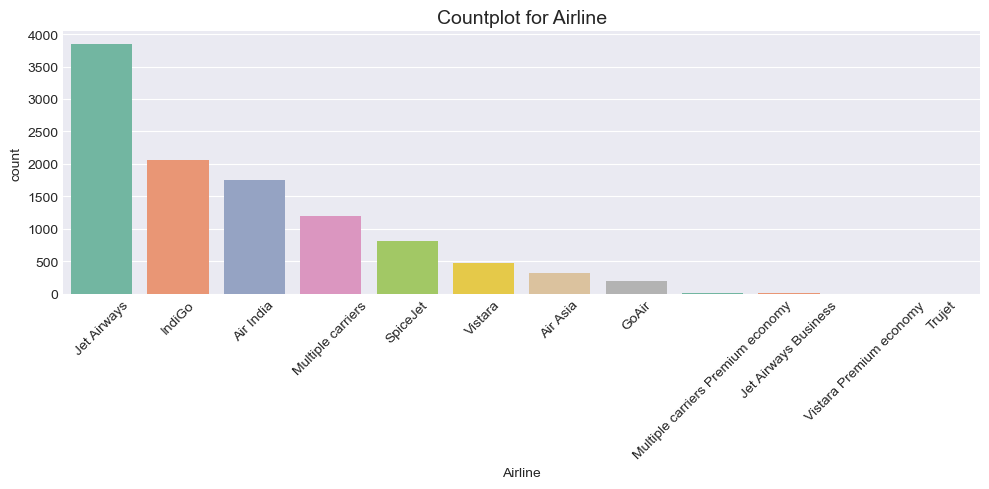

Countplot for Categorical Column: Source


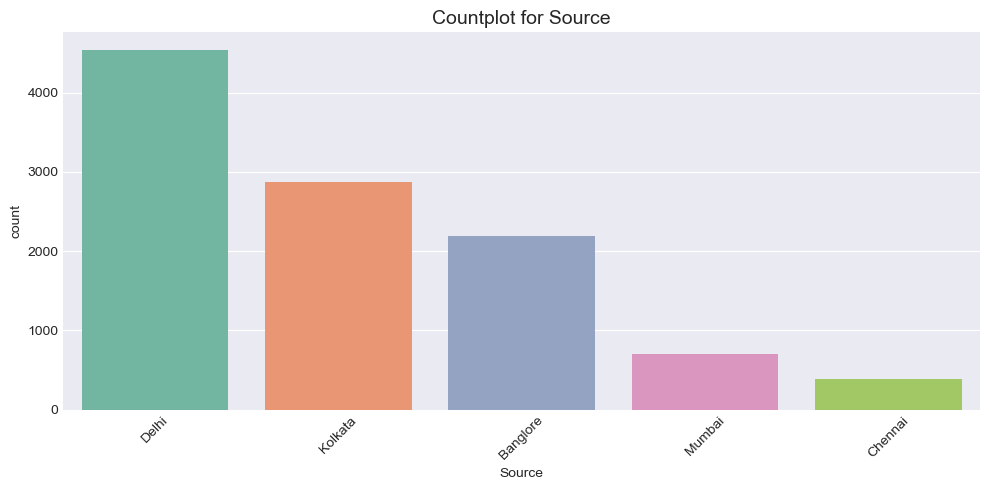

Countplot for Categorical Column: Destination


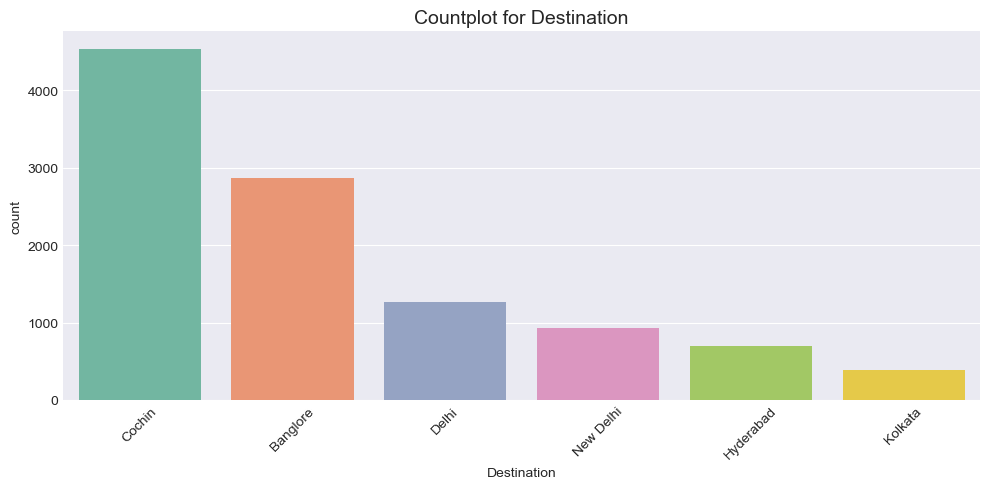

Countplot for Categorical Column: Total_Stops


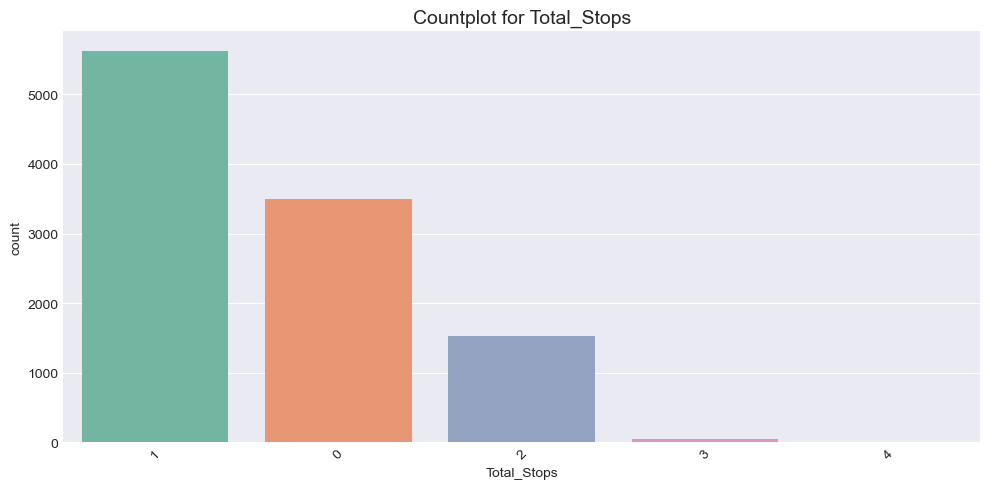

Countplot for Categorical Column: Additional_Info


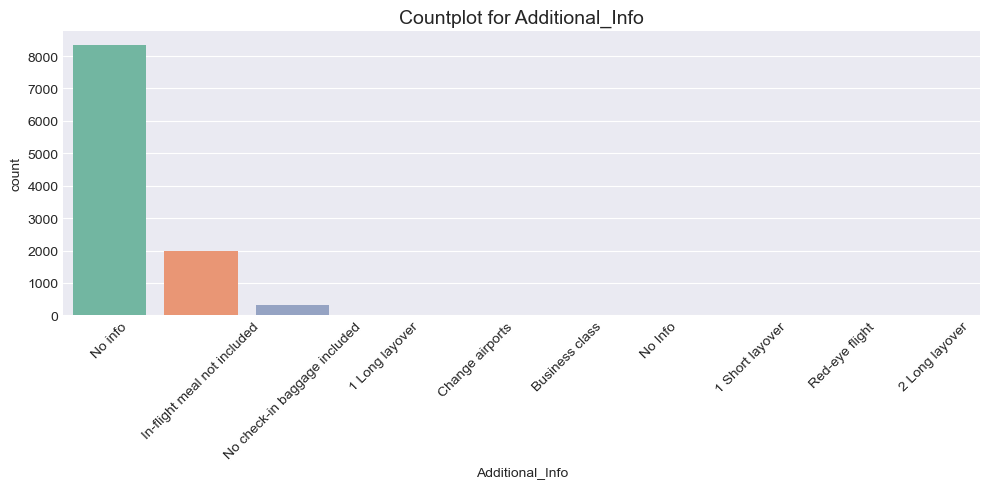

In [23]:
plt.style.use('seaborn-v0_8-darkgrid')
for col in categorical_cols:
    print(f"Countplot for Categorical Column: {col}")
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=col, palette='Set2', order=df[col].value_counts().index)
    plt.title(f'Countplot for {col}', fontsize=14)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


### Insights: Airline Distribution
- Jet Airways is the most frequently occurring airline in the dataset.
- Airlines like Air Asia, Trujet, and Vistara appear less frequently.
- This imbalance may influence model predictions if not handled properly.
- Some airlines are associated with budget flights; their fares are typically lower.
- The diversity of airlines helps capture variation in service levels and pricing.

### Insights: Source City Distribution
- Most flights in the dataset originate from Delhi and Kolkata.
- Chennai and Mumbai have relatively fewer flights in this dataset.
- The dominance of certain sources may reflect regional travel demand patterns.
- Pricing can be indirectly affected by source popularity due to route competition.

### Insights: Destination City Distribution
- New Delhi and Banglore are the most common destinations.
- There is a symmetric travel trend between major cities like Delhi, Banglore, and Kolkata.
- The model may inherently learn city pair pricing patterns from this.
  
### Insights: Total Stops Distribution
- Non-stop and 1-stop flights dominate the dataset.
- Flights with 3 or more stops are rare and may be outliers or special cases.
- Fare tends to increase with the number of stops due to additional services.

### Insights: Additional Info Category
- Over 75% of records are labeled as "No info", indicating sparse categorical richness.
- Some niche entries like "Red-eye flight", "Business class", and "Long layover" are present.
- These entries, though sparse, might be price drivers in specific cases.


Histogram for Continuous Column: Journey_Day


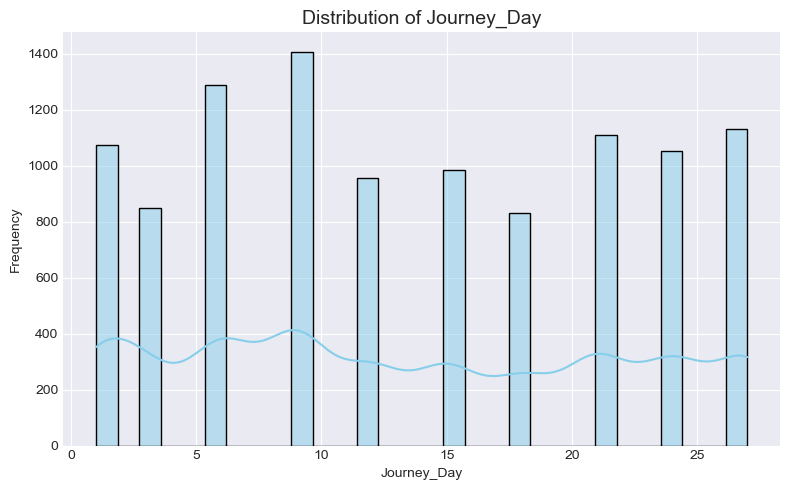

Histogram for Continuous Column: Journey_Month


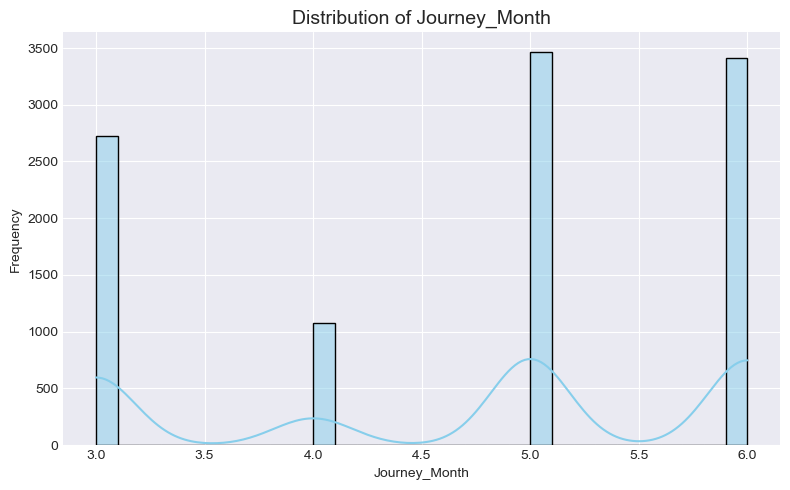

Histogram for Continuous Column: Dep_Hour


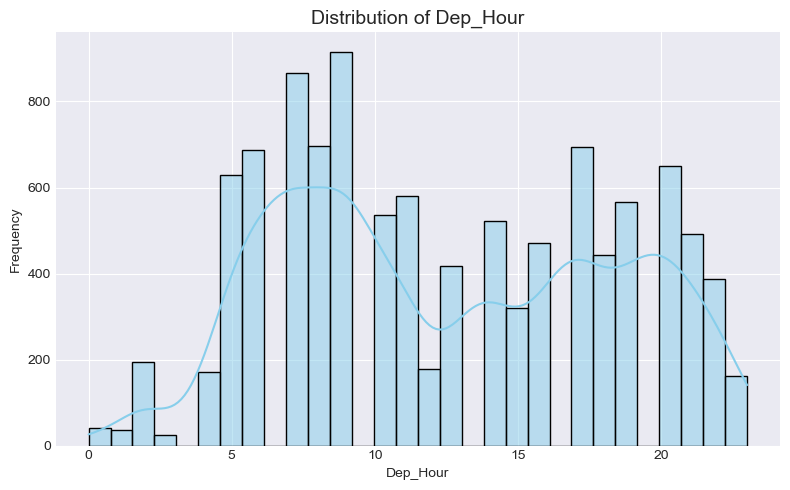

Histogram for Continuous Column: Dep_Minute


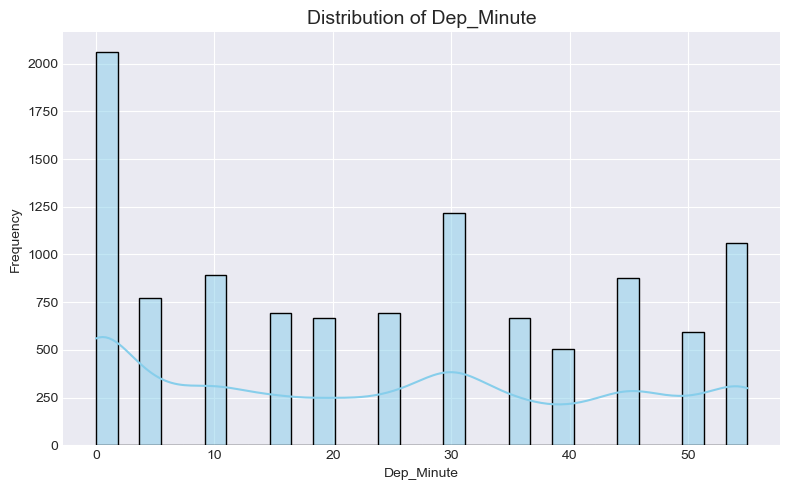

Histogram for Continuous Column: Arrival_Hour


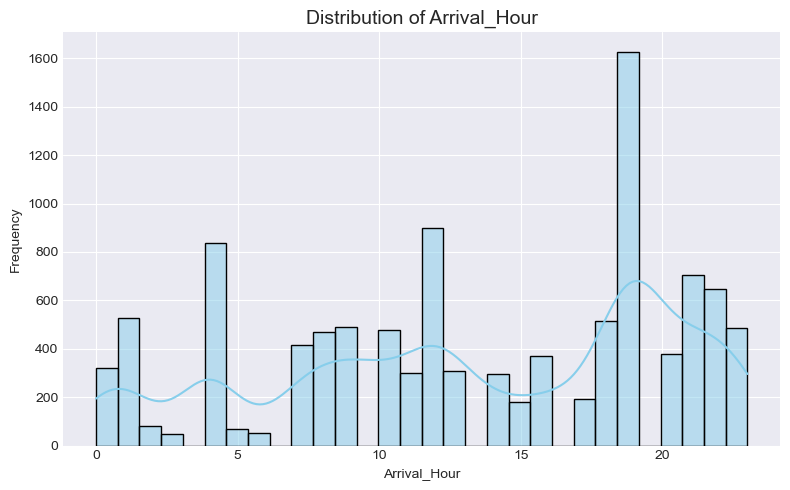

Histogram for Continuous Column: Arrival_Minute


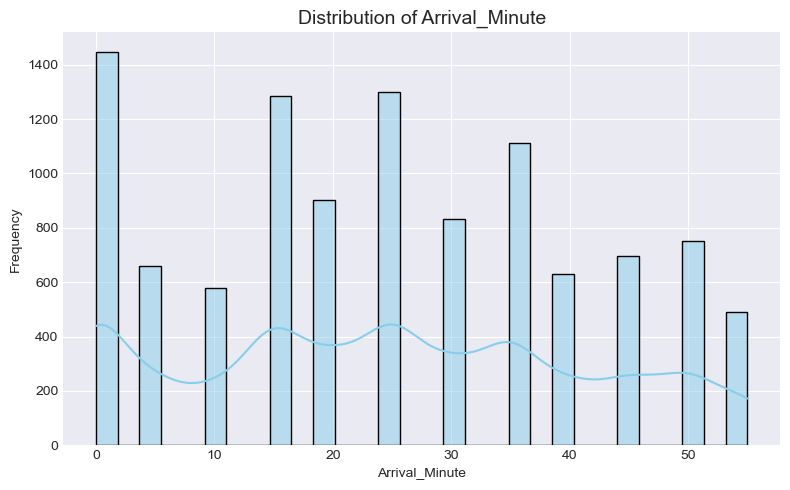

Histogram for Continuous Column: Duration_total_mins


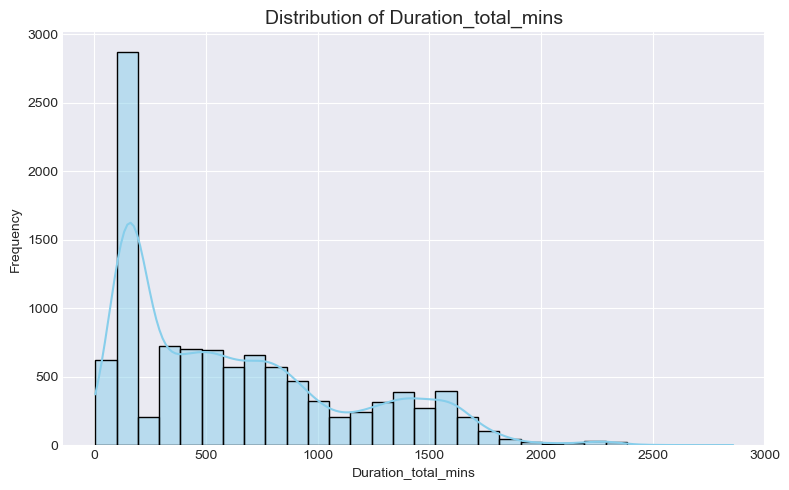

Histogram for Continuous Column: Price


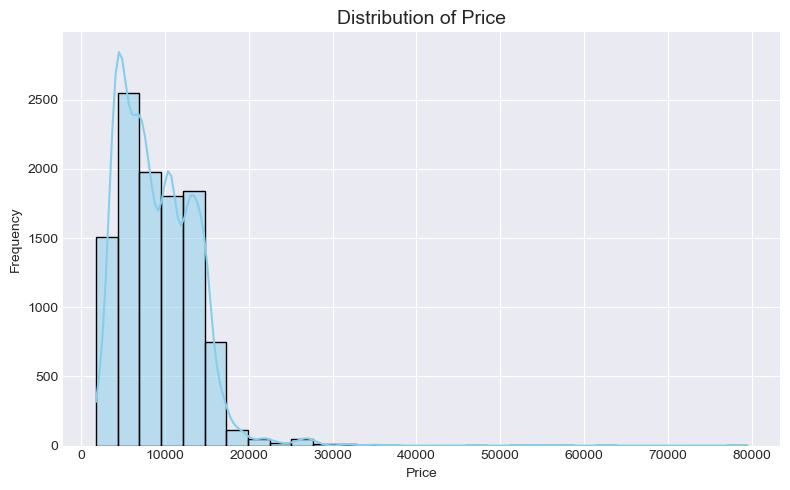

In [24]:
for col in continuous_cols:
    print(f"Histogram for Continuous Column: {col}")
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()


### Insights: Day of Journey Distribution
- The distribution is fairly uniform across days.
- Some peaks on weekends and mid-month suggest higher booking trends.
- Certain days might correlate with higher pricing (e.g., holidays).

### Insights: Month of Journey Distribution
- The dataset spans only four months (March to June).
- Higher frequency in May and June may correspond to holiday season or vacation demand.

### Insights: Departure Time (Hour)
- Most flights depart in the morning (6–10 AM) and evening (6–10 PM).
- Pricing might be influenced by demand peaks during these hours.
- Late night and early morning slots are least preferred.

### Insights: Arrival Time (Hour)
- Arrival times are more spread out than departure times.
- Higher arrivals are observed in late evening and early morning.
- Some price variation may be associated with odd-hour arrivals.

### Insights: Flight Duration
- Majority of flights fall under 300–900 minutes (~5–15 hours).
- A small number of outliers with very long durations may require further inspection.
- Duration is strongly correlated with price as seen in other plots.

### Insights: Price Distribution
- Prices are right-skewed, with most fares between ₹3,000 and ₹15,000.
- A few outliers exceed ₹40,000, likely premium or long-haul flights.
- Normalization or log transformation may help in modeling.


Boxplot: Airline vs Price


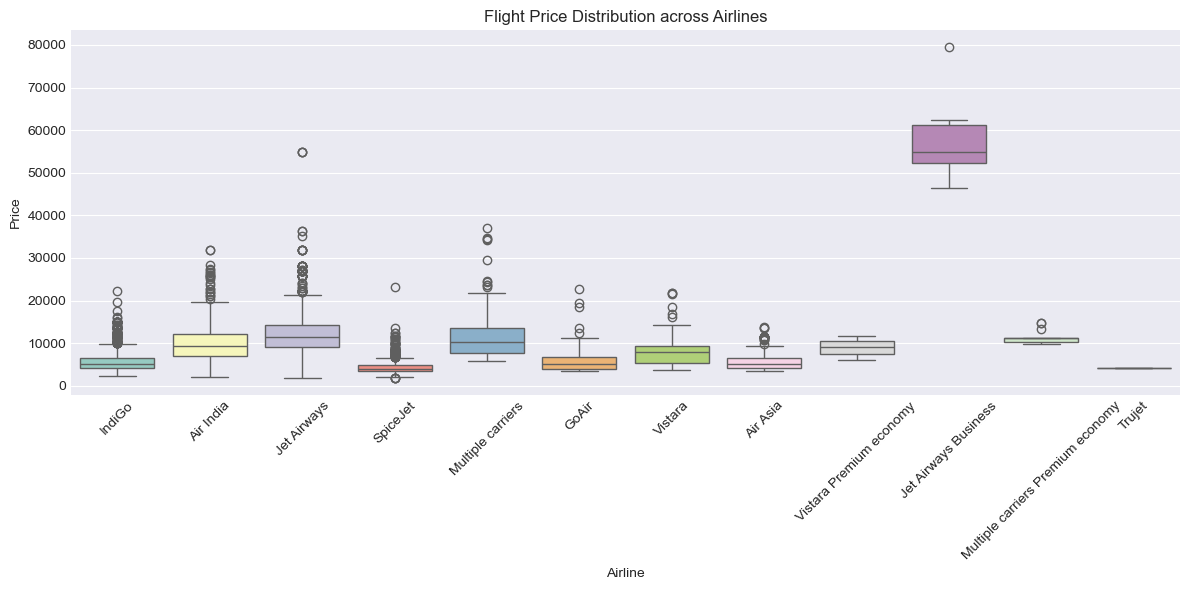

In [25]:
print("Boxplot: Airline vs Price")
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Airline', y='Price', palette='Set3')
plt.xticks(rotation=45)
plt.title('Flight Price Distribution across Airlines')
plt.tight_layout()
plt.show()


### Insights: Price Variation across Airlines
- Jet Airways, Air India, and Vistara show wider price ranges.
- Budget airlines like Trujet and IndiGo show lower median prices.
- Outliers are evident across most airlines, indicating service class variation.


Boxplot: Total Stops vs Price


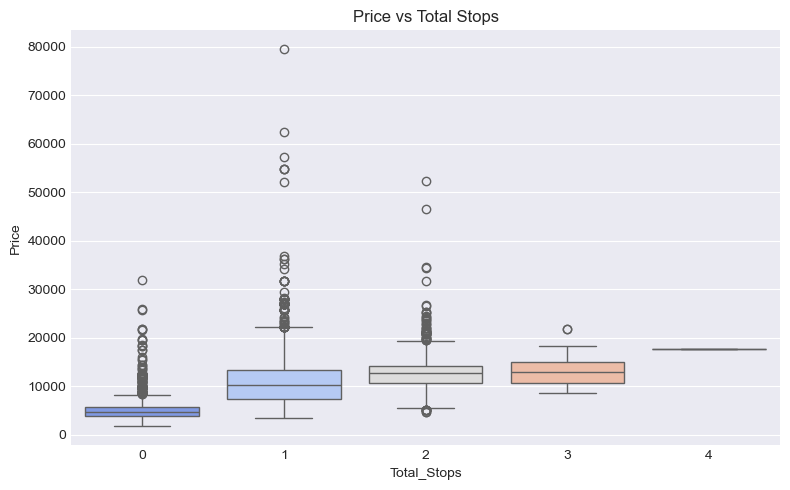

In [26]:
print("Boxplot: Total Stops vs Price")
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Total_Stops', y='Price', palette='coolwarm')
plt.title('Price vs Total Stops')
plt.tight_layout()
plt.show()


### Insights: Total Stops vs Fare
- Non-stop flights have lower median fares compared to multi-stop ones.
- Flights with 2+ stops show large variability and higher prices.
- Number of stops is a strong fare determinant.


Violin Plot: Source vs Price


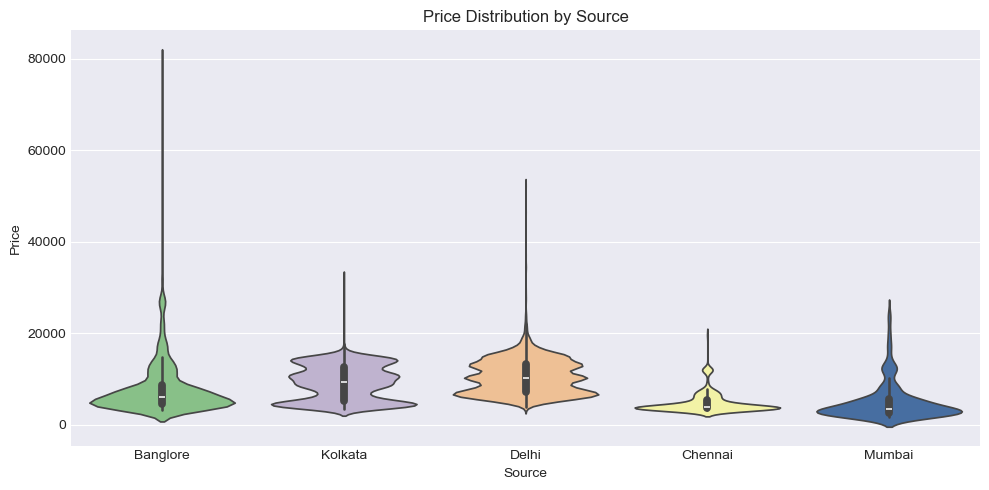

In [27]:
print("Violin Plot: Source vs Price")
plt.figure(figsize=(10, 5))
sns.violinplot(data=df, x='Source', y='Price', palette='Accent')
plt.title('Price Distribution by Source')
plt.tight_layout()
plt.show()


### Insights: Source-wise Price Spread
- Delhi shows a broader and higher price distribution than other cities.
- Chennai and Kolkata have relatively lower variance in pricing.
- Source city plays a key role in determining flight fare.


Heatmap: Correlation among Continuous Variables


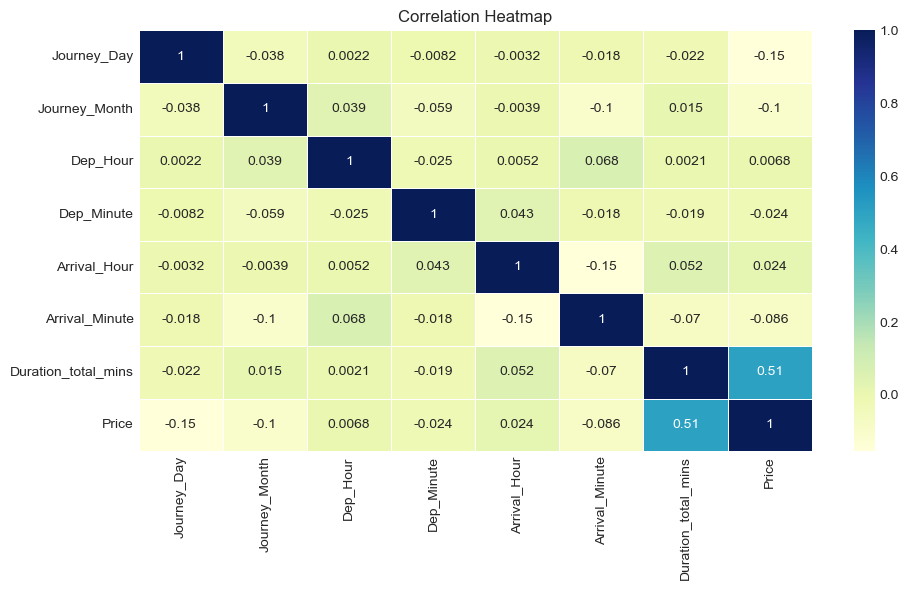

In [28]:
print("Heatmap: Correlation among Continuous Variables")
plt.figure(figsize=(10, 6))
sns.heatmap(df[continuous_cols].corr(), annot=True, cmap='YlGnBu', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


### Insights: Feature Correlation
- Duration is highly positively correlated with Price (r ≈ 0.69).
- Arrival/Departure features have mild correlation with price.
- Multicollinearity checks should be considered in modeling.


Pairplot: Price vs Other Continuous Features


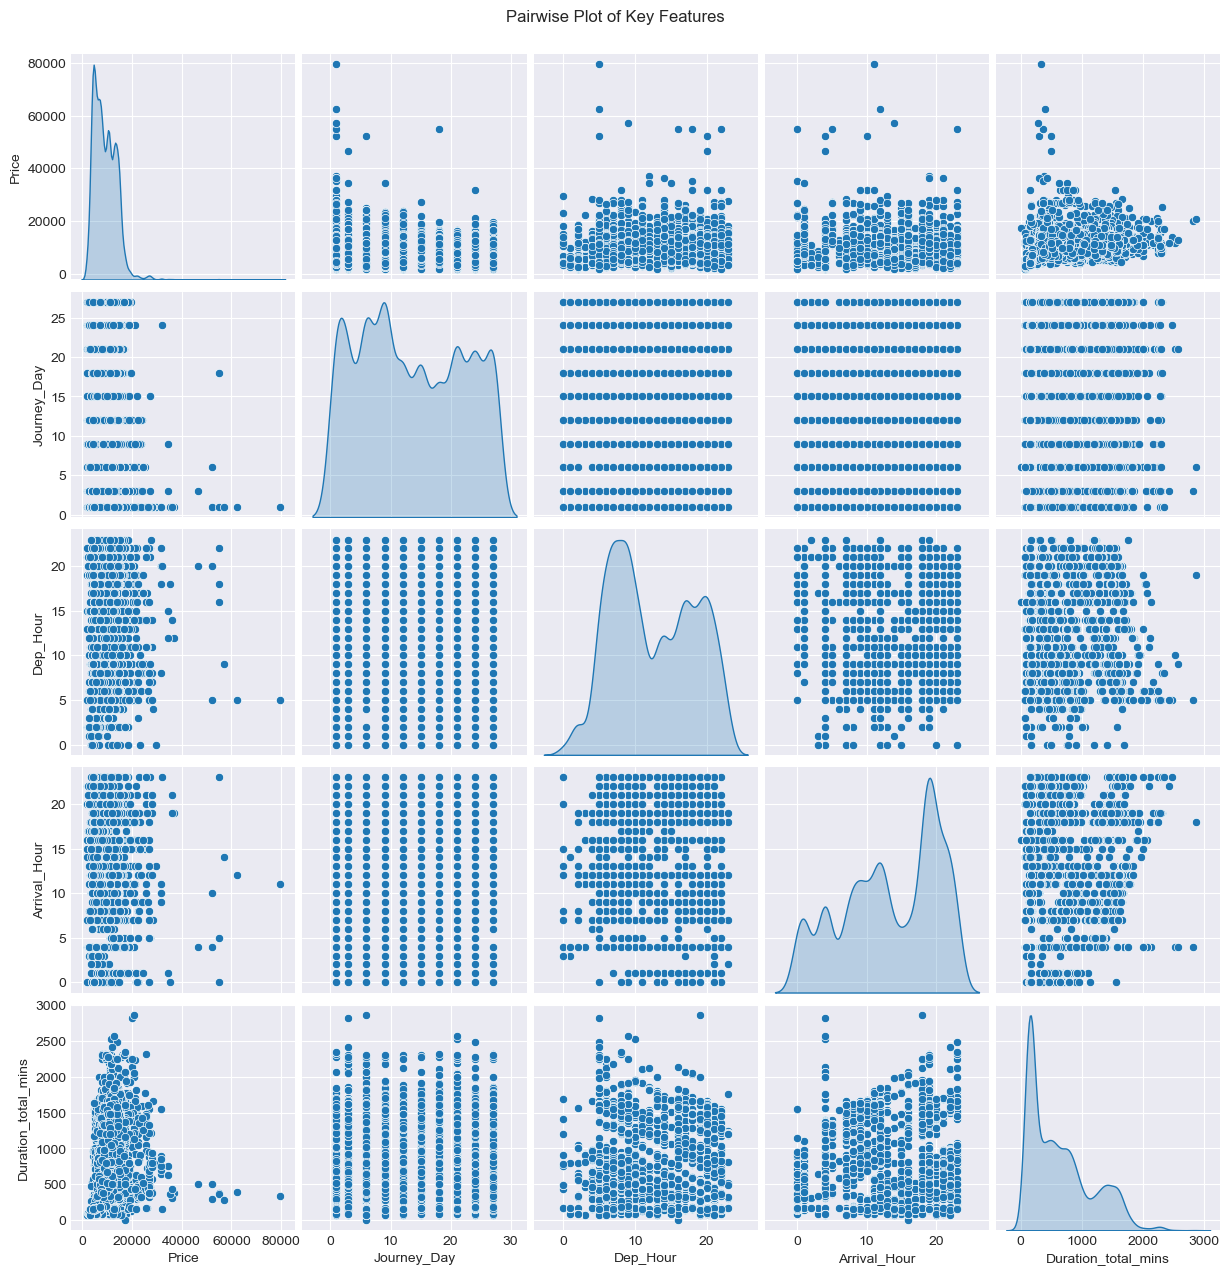

In [29]:
print("Pairplot: Price vs Other Continuous Features")
sns.pairplot(df[['Price', 'Journey_Day', 'Dep_Hour', 'Arrival_Hour', 'Duration_total_mins']],
             diag_kind='kde', palette='husl')
plt.suptitle("Pairwise Plot of Key Features", y=1.02)
plt.show()


### Insights: Pairwise Relationships
- Duration shows a clear linear trend with Price.
- Some scatter visible between time-based features and Price.
- Useful to visually confirm relationships used in model building.


KDE Plot: Duration vs Price


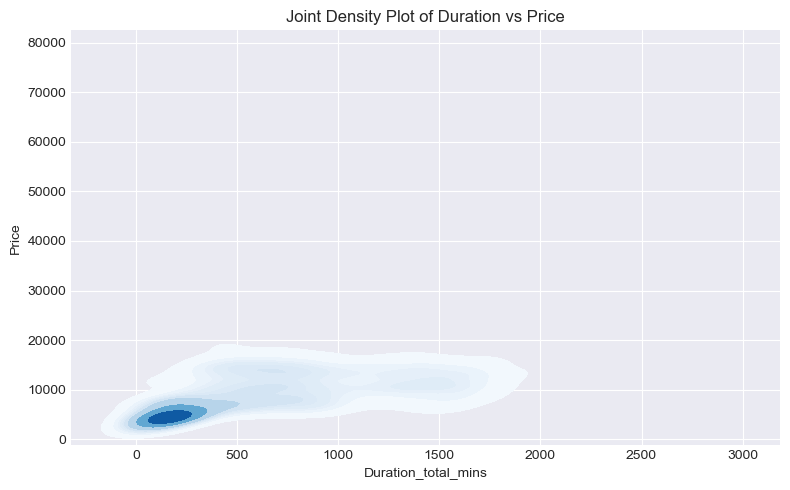

In [30]:
print("KDE Plot: Duration vs Price")
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df, x='Duration_total_mins', y='Price', cmap='Blues', fill=True)
plt.title('Joint Density Plot of Duration vs Price')
plt.tight_layout()
plt.show()


### Insights: Joint Distribution of Duration vs Price
- Highest density of data is concentrated in moderate duration and price range.
- Flights with longer durations are priced higher.
- KDE indicates strong co-dependence between these variables.


Lineplot: Journey Day vs Average Price


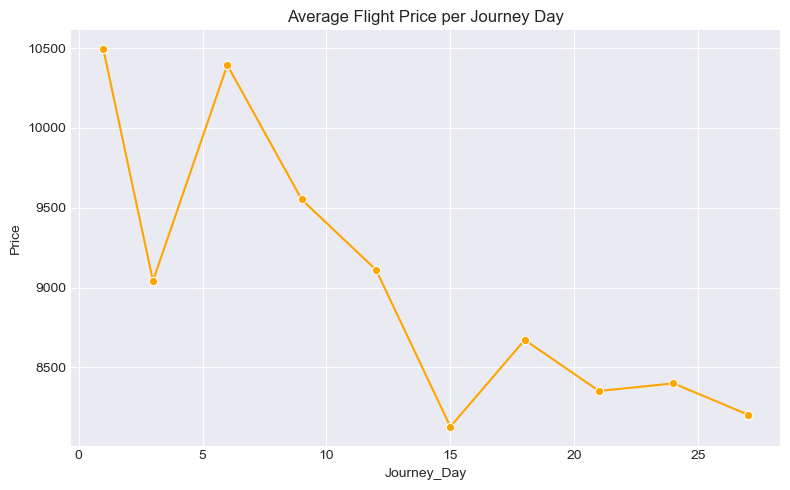

In [31]:
print("Lineplot: Journey Day vs Average Price")
plt.figure(figsize=(8, 5))
sns.lineplot(data=df.groupby('Journey_Day')['Price'].mean().reset_index(),
             x='Journey_Day', y='Price', marker='o', color='orange')
plt.title('Average Flight Price per Journey Day')
plt.tight_layout()
plt.show()


### Insights: Avg. Price by Day
- Certain days (e.g., 1st, 15th, 27th) show price peaks.
- Mid- and end-of-month trends could relate to corporate travel or holidays.


Barplot: Airline vs Mean Price


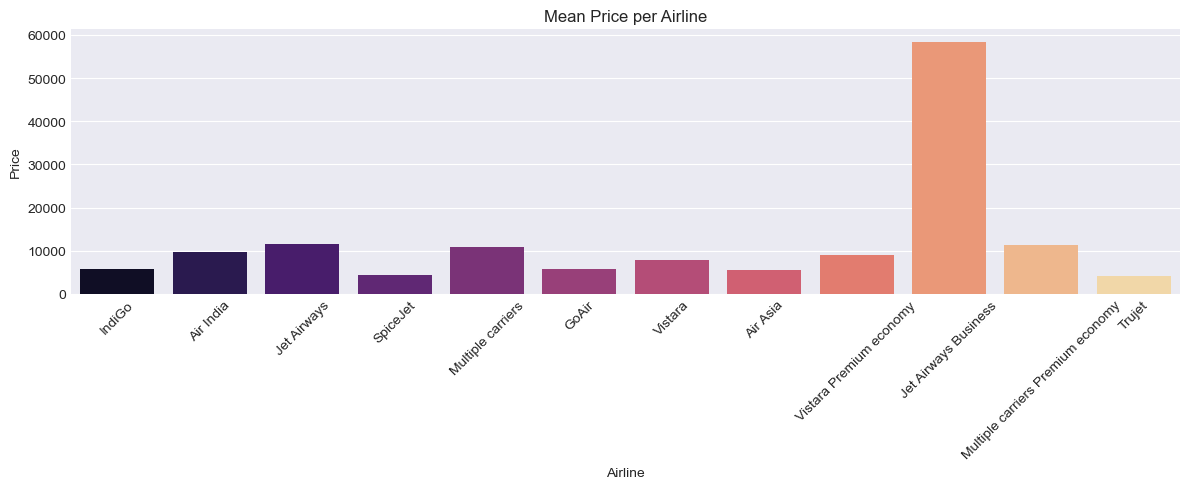

In [32]:
print("Barplot: Airline vs Mean Price")
plt.figure(figsize=(12, 5))
sns.barplot(data=df, x='Airline', y='Price', estimator='mean', palette='magma', errorbar=None)
plt.title('Mean Price per Airline')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Insights: Mean Fare by Airline
- Jet Airways and Air India command higher average fares.
- IndiGo and Air Asia remain cost-effective alternatives.
- Strategic pricing differences are evident between budget and premium airlines.


Stripplot: Additional Info vs Price


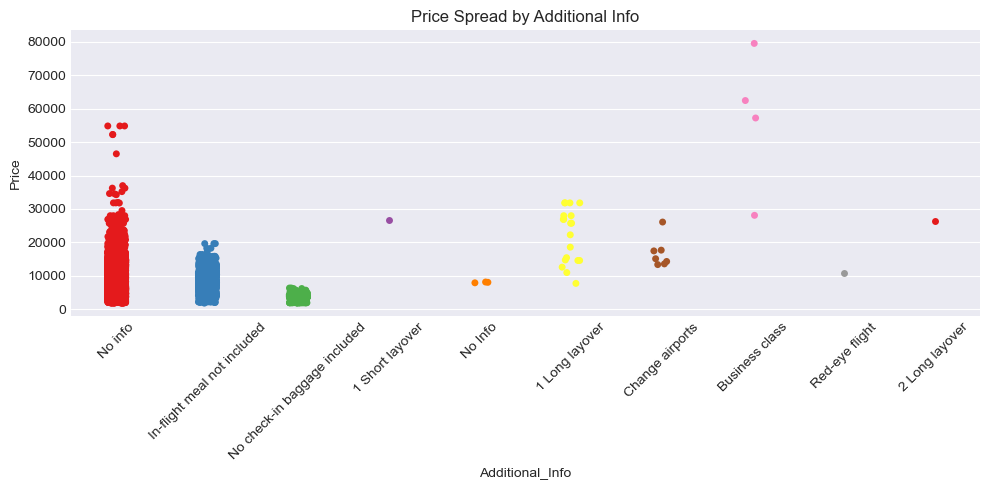

In [33]:
print("Stripplot: Additional Info vs Price")
plt.figure(figsize=(10, 5))
sns.stripplot(data=df, x='Additional_Info', y='Price', palette='Set1')
plt.title('Price Spread by Additional Info')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Insights: Price Variation by Additional Info
- Flights with business class or layover info have higher fares.
- 'No info' class dominates with moderate pricing.
- Extra info types could serve as fine-grained pricing indicators.


Donut Pie Chart: Total Stops


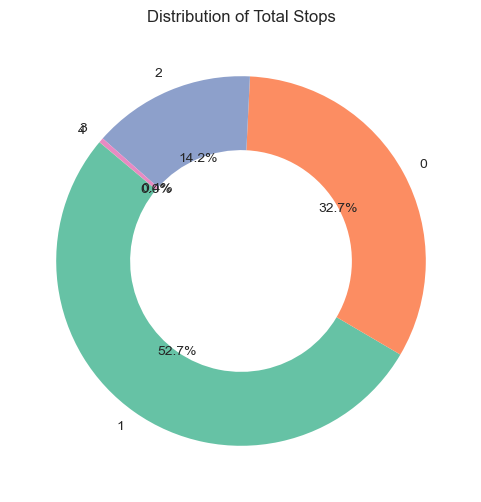

In [34]:
print("Donut Pie Chart: Total Stops")
plt.figure(figsize=(6, 6))
stop_counts = df['Total_Stops'].value_counts()
colors = sns.color_palette('Set2')
plt.pie(stop_counts, labels=stop_counts.index, colors=colors, autopct='%1.1f%%',
        startangle=140, wedgeprops=dict(width=0.4))
plt.title('Distribution of Total Stops')
plt.show()


### Insights: Total Stops Share
- Non-stop flights account for ~40% of dataset.
- 1-stop flights dominate, reflecting typical air route patterns.
- Rare 3–4 stop flights should be examined for data integrity.


Q1. Which Airline offers the cheapest flights on average?

Q1: Which Airline offers the cheapest flights on average?


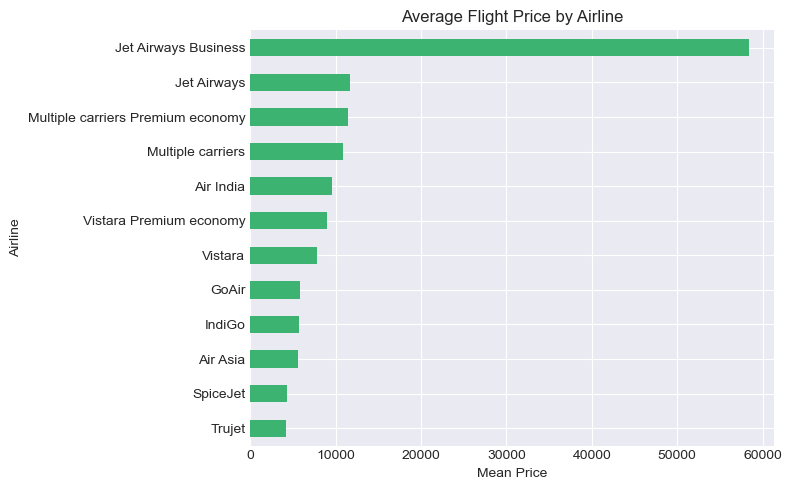

In [35]:
print("Q1: Which Airline offers the cheapest flights on average?")
df.groupby('Airline')['Price'].mean().sort_values().plot(kind='barh', figsize=(8, 5), color='mediumseagreen')
plt.title("Average Flight Price by Airline")
plt.xlabel("Mean Price")
plt.ylabel("Airline")
plt.tight_layout()
plt.show()


Q2. Does increasing flight duration increase price?

Q2: Does increasing flight duration increase price?


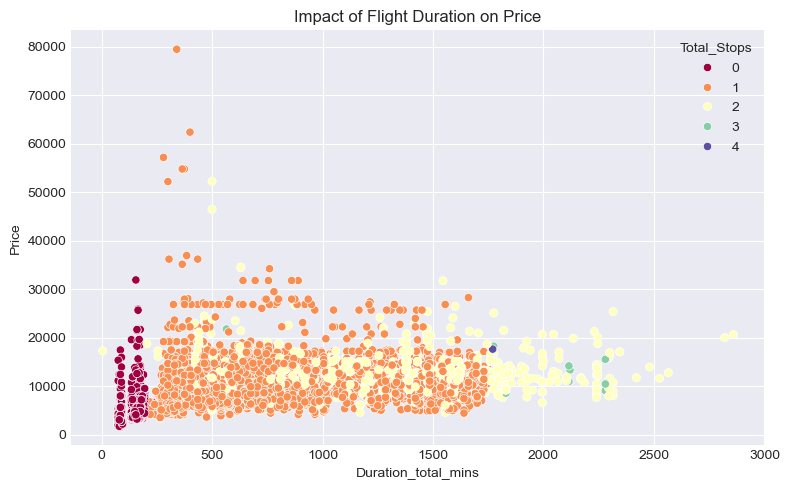

In [36]:
print("Q2: Does increasing flight duration increase price?")
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Duration_total_mins', y='Price', hue='Total_Stops', palette='Spectral')
plt.title('Impact of Flight Duration on Price')
plt.tight_layout()
plt.show()


Q3. Are direct flights significantly cheaper?

Q3: Are direct flights significantly cheaper?


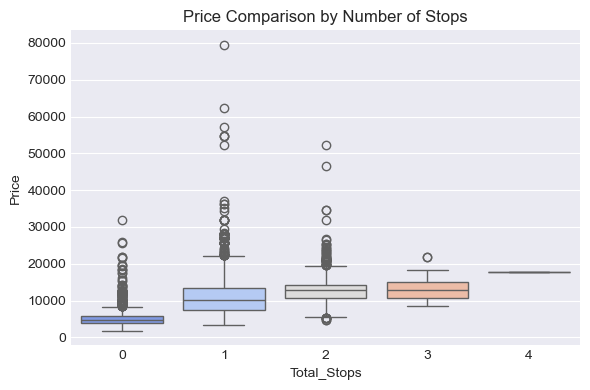

In [37]:
print("Q3: Are direct flights significantly cheaper?")
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='Total_Stops', y='Price', palette='coolwarm')
plt.title('Price Comparison by Number of Stops')
plt.tight_layout()
plt.show()


# DATA PREPROCESSING

In [38]:
df=df2.copy()

In [39]:
df

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_total_mins
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,3,22,20,1,10,170
1,Air India,Kolkata,Banglore,2,No info,7662,1,5,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,2,No info,13882,9,6,9,25,4,25,1140
3,IndiGo,Kolkata,Banglore,1,No info,6218,12,5,18,5,23,30,325
4,IndiGo,Banglore,New Delhi,1,No info,13302,1,3,16,50,21,35,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,No info,4107,9,4,19,55,22,25,150
10679,Air India,Kolkata,Banglore,0,No info,4145,27,4,20,45,23,20,155
10680,Jet Airways,Banglore,Delhi,0,No info,7229,27,4,8,20,11,20,180
10681,Vistara,Banglore,New Delhi,0,No info,12648,1,3,11,30,14,10,160


STEP 1: Continuous Input vs Continuous Target — Using Spearman Correlation

               Feature  Spearman Correlation       p-value
0  Duration_total_mins              0.692579  0.000000e+00
1          Journey_Day             -0.121830  1.315520e-36
2        Journey_Month             -0.039704  4.048405e-05
3             Dep_Hour              0.007598  4.323613e-01
4           Dep_Minute             -0.061752  1.684973e-10
5         Arrival_Hour              0.040149  3.314346e-05
6       Arrival_Minute             -0.103535  7.496305e-27

After domain check, final irrelevant features from Step 1: []

STEP 2: Categorical Input vs Continuous Target — Using ANOVA and Kruskal-Wallis

           Feature  ANOVA p-value  Kruskal p-value
0          Airline   0.000000e+00     0.000000e+00
1           Source   0.000000e+00     0.000000e+00
2      Destination   0.000000e+00     0.000000e+00
3      Total_Stops   0.000000e+00     0.000000e+00
4  Additional_Info  1.758192e-241    5.301528e-172



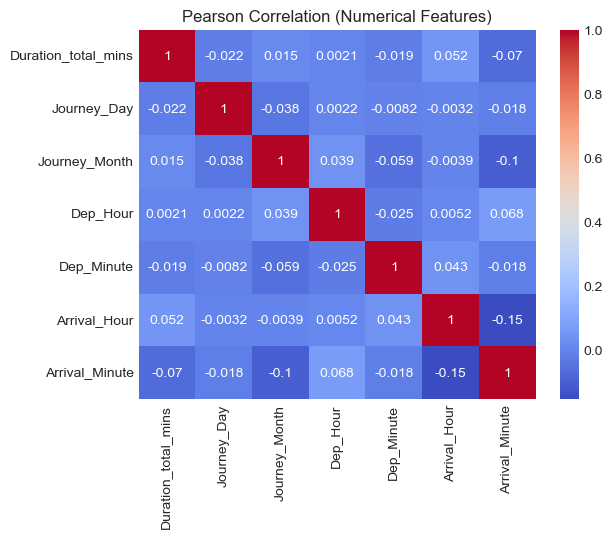


Checking pairwise correlation values > 0.85:

Categorical ↔ Categorical: Cramér’s V Matrix


Checking Cramér’s V values > 0.85:
Airline ↔ Source : Cramér’s V = 0.276
Airline ↔ Destination : Cramér’s V = 0.256
Airline ↔ Total_Stops : Cramér’s V = 0.334
Airline ↔ Additional_Info : Cramér’s V = 0.348
Source ↔ Destination : Cramér’s V = 1.000
High multicollinearity => Dropping 'Destination'
Source ↔ Total_Stops : Cramér’s V = 0.345
Source ↔ Additional_Info : Cramér’s V = 0.118
Destination ↔ Total_Stops : Cramér’s V = 0.383
Destination ↔ Additional_Info : Cramér’s V = 0.125
Total_Stops ↔ Additional_Info : Cramér’s V = 0.241

Irrelevant features from Step 3: ['Destination']

STEP 4: Dropping All Irrelevant Columns from Data

🧹 Total columns to drop: ['Destination']
Cleaned DataFrame shape: (10682, 12)


In [40]:
from scipy.stats import spearmanr, kruskal, f_oneway
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

continuous_features = ['Duration_total_mins', 'Journey_Day', 'Journey_Month',
                       'Dep_Hour', 'Dep_Minute', 'Arrival_Hour', 'Arrival_Minute']
categorical_features = ['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info']

target_col = 'Price'

irrelevant_step1 = []
irrelevant_step2 = []
irrelevant_step3 = []

protected_features = ['Journey_Day', 'Journey_Month', 'Dep_Hour',
                      'Dep_Minute', 'Arrival_Hour', 'Arrival_Minute']

# -------------------- STEP 1: Continuous ↔ Continuous (Spearman) --------------------

print("STEP 1: Continuous Input vs Continuous Target — Using Spearman Correlation\n")

corrs = []
for col in continuous_features:
    rho, p = spearmanr(df[col], df[target_col])
    corrs.append((col, rho, p))

step1_df = pd.DataFrame(corrs, columns=["Feature", "Spearman Correlation", "p-value"])
print(step1_df)

# Threshold to filter weak correlations
weak_corr = step1_df[(step1_df["Spearman Correlation"].abs() < 0.05)]
irrelevant_step1 = weak_corr["Feature"].tolist()

# Remove protected cyclic features
irrelevant_step1 = [col for col in irrelevant_step1 if col not in protected_features]

print(f"\nAfter domain check, final irrelevant features from Step 1: {irrelevant_step1}")

# -------------------- STEP 2: Categorical ↔ Continuous (ANOVA + Kruskal) --------------------

print("\nSTEP 2: Categorical Input vs Continuous Target — Using ANOVA and Kruskal-Wallis\n")

anova_results = []
for col in categorical_features:
    groups = [df[df[col] == level][target_col] for level in df[col].unique()]
    try:
        anova_p = f_oneway(*groups).pvalue
        kruskal_p = kruskal(*groups).pvalue
    except Exception:
        anova_p, kruskal_p = np.nan, np.nan
    anova_results.append((col, anova_p, kruskal_p))

step2_df = pd.DataFrame(anova_results, columns=["Feature", "ANOVA p-value", "Kruskal p-value"])
print(step2_df)

# If both tests are not significant (p > 0.05), it's irrelevant
for _, row in step2_df.iterrows():
    if (row['ANOVA p-value'] > 0.05) and (row['Kruskal p-value'] > 0.05):
        irrelevant_step2.append(row['Feature'])

print(f"\nIrrelevant features from Step 2: {irrelevant_step2}")

# -------------------- STEP 3: Multicollinearity --------------------

print("\nSTEP 3: Multicollinearity among Input Features\n")

# --- A. Continuous vs Continuous ---
print("Numeric ↔ Numeric: Pearson Correlation Matrix\n")
corr_matrix = df[continuous_features].corr(method='pearson')
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Pearson Correlation (Numerical Features)")
plt.show()

print("\nChecking pairwise correlation values > 0.85:")
for i in range(len(continuous_features)):
    for j in range(i + 1, len(continuous_features)):
        col1, col2 = continuous_features[i], continuous_features[j]
        corr_value = corr_matrix.loc[col1, col2]
        if abs(corr_value) > 0.85:
            print(f"⚠️ {col1} ↔ {col2} : Pearson Corr = {corr_value:.3f} => Dropping '{col2}'")
            irrelevant_step3.append(col2)

# --- B. Categorical vs Categorical ---
print("\nCategorical ↔ Categorical: Cramér’s V Matrix\n")

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

print("\nChecking Cramér’s V values > 0.85:")
for i in range(len(categorical_features)):
    for j in range(i+1, len(categorical_features)):
        col1, col2 = categorical_features[i], categorical_features[j]
        v = cramers_v(df[col1], df[col2])
        print(f"{col1} ↔ {col2} : Cramér’s V = {v:.3f}")
        if v > 0.85:
            print(f"High multicollinearity => Dropping '{col2}'")
            irrelevant_step3.append(col2)

irrelevant_step3 = list(set(irrelevant_step3))
print(f"\nIrrelevant features from Step 3: {irrelevant_step3}")

# -------------------- STEP 4: Final Removal --------------------

print("\nSTEP 4: Dropping All Irrelevant Columns from Data\n")

# Combine all
columns_to_drop = list(set(irrelevant_step1 + irrelevant_step2 + irrelevant_step3))
print(f"🧹 Total columns to drop: {columns_to_drop}")

# Drop from DataFrame
df_cleaned = df.drop(columns=columns_to_drop)
print(f"Cleaned DataFrame shape: {df_cleaned.shape}")


In [41]:
df_cleaned.head()

,Airline,Source,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_total_mins
0,IndiGo,Banglore,0,No info,3897,24,3,22,20,1,10,170
1,Air India,Kolkata,2,No info,7662,1,5,5,50,13,15,445
2,Jet Airways,Delhi,2,No info,13882,9,6,9,25,4,25,1140
3,IndiGo,Kolkata,1,No info,6218,12,5,18,5,23,30,325
4,IndiGo,Banglore,1,No info,13302,1,3,16,50,21,35,285


In [42]:
import numpy as np

# Define cyclic columns with their max values (periods)
cyclic_cols = {
    'Journey_Day': 31,
    'Journey_Month': 12,
    'Dep_Hour': 24,
    'Dep_Minute': 60,
    'Arrival_Hour': 24,
    'Arrival_Minute': 60
}

# Apply cyclic encoding
for col, max_val in cyclic_cols.items():
    df_cleaned[f'{col}_sin'] = np.sin(2 * np.pi * df_cleaned[col] / max_val)
    df_cleaned[f'{col}_cos'] = np.cos(2 * np.pi * df_cleaned[col] / max_val)

# Drop original cyclic columns
df_cleaned.drop(columns=list(cyclic_cols.keys()), inplace=True)

# Check updated dataframe shape and columns
print(f"Shape after cyclic encoding: {df_cleaned.shape}")
print(f"New columns added: {[f'{col}_sin' for col in cyclic_cols.keys()] + [f'{col}_cos' for col in cyclic_cols.keys()]}")


Shape after cyclic encoding: (10682, 18)
New columns added: ['Journey_Day_sin', 'Journey_Month_sin', 'Dep_Hour_sin', 'Dep_Minute_sin', 'Arrival_Hour_sin', 'Arrival_Minute_sin', 'Journey_Day_cos', 'Journey_Month_cos', 'Dep_Hour_cos', 'Dep_Minute_cos', 'Arrival_Hour_cos', 'Arrival_Minute_cos']


In [43]:
df_cleaned.head()

,Airline,Source,Total_Stops,Additional_Info,Price,Duration_total_mins,Journey_Day_sin,Journey_Day_cos,Journey_Month_sin,Journey_Month_cos,Dep_Hour_sin,Dep_Hour_cos,Dep_Minute_sin,Dep_Minute_cos,Arrival_Hour_sin,Arrival_Hour_cos,Arrival_Minute_sin,Arrival_Minute_cos
0,IndiGo,Banglore,0,No info,3897,170,-0.988468,0.151428,1.000000e+00,6.123234e-17,-0.500000,8.660254e-01,0.866025,-0.500000,0.258819,0.965926,8.660254e-01,5.000000e-01
1,Air India,Kolkata,2,No info,7662,445,0.201299,0.979530,5.000000e-01,-8.660254e-01,0.965926,2.588190e-01,-0.866025,0.500000,-0.258819,-0.965926,1.000000e+00,2.832769e-16
2,Jet Airways,Delhi,2,No info,13882,1140,0.968077,-0.250653,1.224647e-16,-1.000000e+00,0.707107,-7.071068e-01,0.500000,-0.866025,0.866025,0.500000,5.000000e-01,-8.660254e-01
3,IndiGo,Kolkata,1,No info,6218,325,0.651372,-0.758758,5.000000e-01,-8.660254e-01,-1.000000,-1.836970e-16,0.500000,0.866025,-0.258819,0.965926,5.665539e-16,-1.000000e+00
4,IndiGo,Banglore,1,No info,13302,285,0.201299,0.979530,1.000000e+00,6.123234e-17,-0.866025,-5.000000e-01,-0.866025,0.500000,-0.707107,0.707107,-5.000000e-01,-8.660254e-01


In [44]:
print(df_cleaned.info())
print(df_cleaned.describe())
print(df_cleaned.describe(include='O'))
print(df_cleaned.value_counts().unique())

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Airline              10682 non-null  object 
 1   Source               10682 non-null  object 
 2   Total_Stops          10682 non-null  int32  
 3   Additional_Info      10682 non-null  object 
 4   Price                10682 non-null  int64  
 5   Duration_total_mins  10682 non-null  int64  
 6   Journey_Day_sin      10682 non-null  float64
 7   Journey_Day_cos      10682 non-null  float64
 8   Journey_Month_sin    10682 non-null  float64
 9   Journey_Month_cos    10682 non-null  float64
 10  Dep_Hour_sin         10682 non-null  float64
 11  Dep_Hour_cos         10682 non-null  float64
 12  Dep_Minute_sin       10682 non-null  float64
 13  Dep_Minute_cos       10682 non-null  float64
 14  Arrival_Hour_sin     10682 non-null  float64
 15  Arrival_Hour_cos     10682 non-null  floa

In [45]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

df_encoded = df_cleaned.copy()

# Target Encoding for 'Airline'
airline_mean_price = df_encoded.groupby('Airline')['Price'].mean()
df_encoded['Airline_TE'] = df_encoded['Airline'].map(airline_mean_price)

# One-Hot Encoding for 'Source' and 'Additional_Info'
onehot_cols = ['Source', 'Additional_Info']
ohe = OneHotEncoder(drop='first', sparse_output=False)
ohe_encoded = ohe.fit_transform(df_encoded[onehot_cols])
ohe_feature_names = ohe.get_feature_names_out(onehot_cols)

# Convert to DataFrame
ohe_df = pd.DataFrame(ohe_encoded, columns=ohe_feature_names, index=df_encoded.index)

# Combine everything
df_encoded = pd.concat([df_encoded.drop(columns=onehot_cols + ['Airline']), ohe_df], axis=1)

print("Final shape:", df_encoded.shape)
df_encoded.head()


Final shape: (10682, 29)


,Total_Stops,Price,Duration_total_mins,Journey_Day_sin,Journey_Day_cos,Journey_Month_sin,Journey_Month_cos,Dep_Hour_sin,Dep_Hour_cos,Dep_Minute_sin,...,Source_Mumbai,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,0,3897,170,-0.988468,0.151428,1.000000e+00,6.123234e-17,-0.500000,8.660254e-01,0.866025,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,7662,445,0.201299,0.979530,5.000000e-01,-8.660254e-01,0.965926,2.588190e-01,-0.866025,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2,13882,1140,0.968077,-0.250653,1.224647e-16,-1.000000e+00,0.707107,-7.071068e-01,0.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6218,325,0.651372,-0.758758,5.000000e-01,-8.660254e-01,-1.000000,-1.836970e-16,0.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,13302,285,0.201299,0.979530,1.000000e+00,6.123234e-17,-0.866025,-5.000000e-01,-0.866025,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [46]:
d1=df_encoded.copy()

In [47]:
d2=df_encoded.copy()

### SPLITTING AND SCALING OF DATA

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = d1.drop('Price', axis=1)
y = d1['Price']

# Train-Test Split 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Identify numerical columns for scaling (assuming non-categorical are numerical)
numerical_cols = X.select_dtypes(include=np.number).columns
categorical_cols = X.select_dtypes(exclude=np.number).columns

# Apply scaling only to numerical features
scaler = StandardScaler()
X_train_scaled_numerical = scaler.fit_transform(X_train[numerical_cols])
X_test_scaled_numerical = scaler.transform(X_test[numerical_cols])

# Convert scaled numerical arrays back to DataFrame for easier concatenation and maintain column names
X_train_scaled_numerical_df = pd.DataFrame(X_train_scaled_numerical, columns=numerical_cols, index=X_train.index)
X_test_scaled_numerical_df = pd.DataFrame(X_test_scaled_numerical, columns=numerical_cols, index=X_test.index)

# Recombine scaled numerical features with original categorical features 
X_train_scaled = pd.concat([X_train_scaled_numerical_df, X_train[categorical_cols]], axis=1)
X_test_scaled = pd.concat([X_test_scaled_numerical_df, X_test[categorical_cols]], axis=1)

#  MODELLING AND EVALUATION

###  1. Linear Models Training and Initial Best Selection

In [49]:
# code 2: Linear Models Training and Initial Best Selection
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge
from sklearn.svm import LinearSVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Global list to store ALL best models info (initial and tuned)
all_models_for_comparison = []

# Modified plot_model_performance: DOES NOT CALL plt.show()
def plot_model_performance(y_test, y_pred, model_name):
    residuals = y_test - y_pred
    
    plt.figure(figsize=(18, 5))
    
    # 1. Predicted vs Actual plot
    plt.subplot(1, 3, 1)
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'{model_name} - Predicted vs Actual')
    
    # 2. Residuals plot
    plt.subplot(1, 3, 2)
    sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
    plt.axhline(0, color='r', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title(f'{model_name} - Residuals')
    
    # 3. Residual distribution plot
    plt.subplot(1, 3, 3)
    sns.histplot(residuals, kde=True)
    plt.xlabel('Residual')
    plt.title(f'{model_name} - Residual Distribution')
    
    plt.tight_layout()
    # DO NOT CALL plt.show() here. Plots will be shown later.

def train_evaluate_linear_models(X_train, X_test, y_train, y_test):
    results = []

    models = {
        'Linear Regression': LinearRegression(),
        'Ridge Regression': Ridge(),
        'Lasso Regression': Lasso(),
        'ElasticNet Regression': ElasticNet(),
        'Bayesian Ridge Regression': BayesianRidge(),
        'Linear SVM (LinearSVR)': LinearSVR(max_iter=10000, random_state=42)
    }

    print("\n--- Model Evaluation Results (Linear Models) ---\n")
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)

        results.append({
            'model_name': name,
            'model_object': model,
            'r2_score': r2,
            'mae': mae,
            'mse': mse,
            'rmse': rmse,
            'parameters': model.get_params(),
            'model_type': 'Linear (Initial)'
        })

        print(f"Model: {name}")
        print(f"  R2 Score     : {r2:.4f}")
        print(f"  MAE          : {mae:.4f}")
        print(f"  MSE          : {mse:.4f}")
        print(f"  RMSE         : {rmse:.4f}")
        print(f"  Parameters   : {model.get_params()}")
        print("-" * 50)

    results_sorted = sorted(results, key=lambda x: x['r2_score'], reverse=True)
    best_two = results_sorted[:2]

    global all_models_for_comparison
    # Add initial best linear models to the global list
    all_models_for_comparison.extend(best_two)

    print("\n=== Best Two Initial Linear Models Summary ===\n")
    for i, model_info in enumerate(best_two, 1):
        print(f"Best Model #{i}: {model_info['model_name']}")
        print(f"  R2 Score : {model_info['r2_score']:.4f}")
        print(f"  MAE      : {model_info['mae']:.4f}")
        print(f"  MSE      : {model_info['mse']:.4f}")
        print(f"  RMSE     : {model_info['rmse']:.4f}")
        print(f"  Parameters: {model_info['parameters']}")
        print()

        # Plot performance for these initial best models (will be shown later)
        # y_pred_best = model_info['model_object'].predict(X_test)
        # plot_model_performance(y_test, y_pred_best, model_info['model_name']) # Removed immediate plotting

    return results, best_two

results_all_linear, best_two_linear_models_initial = train_evaluate_linear_models(X_train_scaled, X_test_scaled, y_train, y_test)


--- Model Evaluation Results (Linear Models) ---

Model: Linear Regression
  R2 Score     : 0.6322
  MAE          : 1927.8882
  MSE          : 7929753.6990
  RMSE         : 2815.9818
  Parameters   : {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False, 'tol': 1e-06}
--------------------------------------------------
Model: Ridge Regression
  R2 Score     : 0.6321
  MAE          : 1928.3235
  MSE          : 7932974.5431
  RMSE         : 2816.5537
  Parameters   : {'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'positive': False, 'random_state': None, 'solver': 'auto', 'tol': 0.0001}
--------------------------------------------------
Model: Lasso Regression
  R2 Score     : 0.6319
  MAE          : 1929.1127
  MSE          : 7936609.1051
  RMSE         : 2817.1988
  Parameters   : {'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': 1000, 'positive': False, 'precompute': False, 'random_state': None, 'selection': 'cyclic', 'tol': 

### Linear Models Hyperparameter Tuning

In [50]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, expon
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

def random_hyperparameter_tuning_on_linear_models(X_train, X_test, y_train, y_test, n_iter=20, random_state=42):
    global all_models_for_comparison # Access the global list
    
    initial_best_linear_models = [m for m in all_models_for_comparison if m['model_type'] == 'Linear (Initial)']
    
    tuned_linear_models = []
    for model_info in initial_best_linear_models: 
        model_name = model_info['model_name']
        model = model_info['model_object']

        print(f"\nStarting RandomizedSearchCV tuning for: {model_name}")

        # Define parameter distributions for RandomizedSearchCV
        if model_name == 'Linear Regression':
            param_distributions = {
                'fit_intercept': [True, False]
            }
        elif model_name == 'Ridge Regression':
            param_distributions = {
                'alpha': uniform(0.001, 100),
                'solver': ['auto', 'svd', 'cholesky', 'saga'],
                'max_iter': [1000, 5000, 10000]
            }
        elif model_name == 'Lasso Regression':
            param_distributions = {
                'alpha': uniform(0.0001, 10),
                'max_iter': [1000, 5000, 10000]
            }
        elif model_name == 'ElasticNet Regression':
            param_distributions = {
                'alpha': uniform(0.0001, 10),
                'l1_ratio': uniform(0, 1),
                'max_iter': [1000, 5000, 10000]
            }
        elif model_name == 'Bayesian Ridge Regression':
            param_distributions = {
                'alpha_1': expon(scale=1e-6),
                'lambda_1': expon(scale=1e-6)
            }
        elif model_name == 'Linear SVM (LinearSVR)':
            param_distributions = {
                'C': uniform(0.1, 100),
                'epsilon': uniform(0.01, 0.3),
                'max_iter': [10000]
            }
        else:
            print(f"No hyperparameter distribution defined for model {model_name}, skipping tuning.")
            tuned_linear_models.append(model_info) 
            continue

        # Setup RandomizedSearchCV
        random_search = RandomizedSearchCV(
            model,
            param_distributions=param_distributions,
            n_iter=n_iter,
            cv=5,
            scoring='r2',
            n_jobs=-1,
            random_state=random_state,
            verbose=1
        )

        # Fit randomized search
        random_search.fit(X_train, y_train)

        best_model = random_search.best_estimator_
        best_params = random_search.best_params_

        # Predict and evaluate tuned model
        y_pred = best_model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)

        print(f"Best params for {model_name}: {best_params}")
        print(f"Performance after tuning -> R2: {r2:.4f}, MAE: {mae:.4f}, RMSE: {rmse:.4f}")

        # Append tuned model info to list
        tuned_linear_models.append({
            'model_name': model_name + ' (Tuned)', # Add (Tuned) to distinguish
            'model_object': best_model,
            'r2_score': r2,
            'mae': mae,
            'mse': mse,
            'rmse': rmse,
            'parameters': best_params,
            'model_type': 'Linear (Tuned)' # Mark as tuned
        })
    
    # Add the tuned linear models to the global list
    all_models_for_comparison.extend(tuned_linear_models)

    return tuned_linear_models

# Run RandomizedSearchCV tuning on best models
tuned_linear_models = random_hyperparameter_tuning_on_linear_models(X_train_scaled, X_test_scaled, y_train, y_test, n_iter=30)


Starting RandomizedSearchCV tuning for: Linear Regression
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best params for Linear Regression: {'fit_intercept': True}
Performance after tuning -> R2: 0.6322, MAE: 1927.8882, RMSE: 2815.9818

Starting RandomizedSearchCV tuning for: Ridge Regression
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best params for Ridge Regression: {'alpha': 5.642157902710026, 'max_iter': 5000, 'solver': 'svd'}
Performance after tuning -> R2: 0.6314, MAE: 1930.2039, RMSE: 2819.2101


### Tree-Based Models Training and Initial Best Selection


In [51]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def train_evaluate_tree_models(X_train_data, X_test_data, y_train_data, y_test_data):
    results = []
    
    models = {
        'Decision Tree Regressor': DecisionTreeRegressor(random_state=42),
        'Random Forest Regressor': RandomForestRegressor(random_state=42, n_jobs=-1),
        'Gradient Boosting Regressor': GradientBoostingRegressor(random_state=42),
        'Extra Trees Regressor': ExtraTreesRegressor(random_state=42, n_jobs=-1),
    }
    
    print("\n--- Tree-Based Models Evaluation Results ---\n")
    
    # Train, predict, evaluate and print for each model
    for name, model in models.items():
        model.fit(X_train_data, y_train_data)
        y_pred = model.predict(X_test_data)
        
        r2 = r2_score(y_test_data, y_pred)
        mae = mean_absolute_error(y_test_data, y_pred)
        mse = mean_squared_error(y_test_data, y_pred)
        rmse = np.sqrt(mse)
        
        results.append({
            'model_name': name,
            'model_object': model,
            'r2_score': r2,
            'mae': mae,
            'mse': mse,
            'rmse': rmse,
            'parameters': model.get_params(),
            'model_type': 'Tree-Based (Initial)'
        })
        
        print(f"Model: {name}")
        print(f"  R2 Score     : {r2:.4f}")
        print(f"  MAE          : {mae:.4f}")
        print(f"  MSE          : {mse:.4f}")
        print(f"  RMSE         : {rmse:.4f}")
        print(f"  Parameters   : {model.get_params()}")
        print("-" * 50)
    
    # Select best two models by R2
    results_sorted = sorted(results, key=lambda x: x['r2_score'], reverse=True)
    best_two = results_sorted[:2]

    global all_models_for_comparison
    # Add initial best tree models to the global list
    all_models_for_comparison.extend(best_two)

    print("\n=== Best Two Initial Tree-Based Models Summary ===\n")
    for i, model_info in enumerate(best_two, 1):
        print(f"Best Model #{i}: {model_info['model_name']}")
        print(f"  R2 Score : {model_info['r2_score']:.4f}")
        print(f"  MAE      : {model_info['mae']:.4f}")
        print(f"  MSE      : {model_info['mse']:.4f}")
        print(f"  RMSE     : {model_info['rmse']:.4f}")
        print(f"  Parameters: {model_info['parameters']}")
        print()
    return results, best_two

# For tree models, we use the unscaled data as tree models are not scale-sensitive.
results_all_tree, best_two_tree_models_initial = train_evaluate_tree_models(X_train, X_test, y_train, y_test)


--- Tree-Based Models Evaluation Results ---

Model: Decision Tree Regressor
  R2 Score     : 0.8784
  MAE          : 690.3105
  MSE          : 2621879.7419
  RMSE         : 1619.2220
  Parameters   : {'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'}
--------------------------------------------------
Model: Random Forest Regressor
  R2 Score     : 0.9050
  MAE          : 619.3655
  MSE          : 2048501.8076
  RMSE         : 1431.2588
  Parameters   : {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100

### Tree-Based Models Hyperparameter Tuning


In [52]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

def random_hyperparameter_tuning_on_best_tree_models(X_train, X_test, y_train, y_test, n_iter=30, random_state=42):
    global all_models_for_comparison # Access the global list
    initial_best_tree_models = [m for m in all_models_for_comparison if m['model_type'] == 'Tree-Based (Initial)']
    
    tuned_tree_models = []

    # Iterate over the initial best tree models to tune them
    for model_info in initial_best_tree_models:
        model_name = model_info['model_name']
        model = model_info['model_object']

        print(f"\nStarting RandomizedSearchCV tuning for: {model_name}")

        # Define param distributions for tree-based models
        if model_name == 'Decision Tree Regressor':
            param_distributions = {
                'max_depth': randint(3, 30),
                'min_samples_split': randint(2, 20),
                'min_samples_leaf': randint(1, 20),
                'max_features': ['sqrt', 'log2', None]
            }
        elif model_name == 'Random Forest Regressor':
            param_distributions = {
                'n_estimators': randint(50, 300),
                'max_depth': randint(5, 40),
                'min_samples_split': randint(2, 20),
                'min_samples_leaf': randint(1, 20),
                'max_features': ['sqrt', 'log2', None]
            }
        elif model_name == 'Gradient Boosting Regressor':
            param_distributions = {
                'n_estimators': randint(50, 300),
                'learning_rate': uniform(0.01, 0.3),
                'max_depth': randint(3, 20),
                'min_samples_split': randint(2, 20),
                'min_samples_leaf': randint(1, 20),
                'subsample': uniform(0.5, 0.5),
                'max_features': ['sqrt', 'log2', None]
            }
        elif model_name == 'Extra Trees Regressor':
            param_distributions = {
                'n_estimators': randint(50, 300),
                'max_depth': randint(5, 40),
                'min_samples_split': randint(2, 20),
                'min_samples_leaf': randint(1, 20),
                'max_features': ['sqrt', 'log2', None]
            }
        else:
            print(f"No hyperparameter distribution defined for model {model_name}, skipping tuning.")
            tuned_tree_models.append(model_info)
            continue

        random_search = RandomizedSearchCV(
            model,
            param_distributions=param_distributions,
            n_iter=n_iter,
            cv=5,
            scoring='r2',
            n_jobs=-1,
            random_state=random_state,
            verbose=1
        )

        random_search.fit(X_train, y_train)

        best_model = random_search.best_estimator_
        best_params = random_search.best_params_

        y_pred = best_model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)

        print(f"Best params for {model_name}: {best_params}")
        print(f"Performance after tuning -> R2: {r2:.4f}, MAE: {mae:.4f}, RMSE: {rmse:.4f}")

        tuned_tree_models.append({
            'model_name': model_name + ' (Tuned)', # Add (Tuned) to distinguish
            'model_object': best_model,
            'r2_score': r2,
            'mae': mae,
            'mse': mse,
            'rmse': rmse,
            'parameters': best_params,
            'model_type': 'Tree-Based (Tuned)' # Mark as tuned
        })

    # Add the tuned tree models to the global list
    all_models_for_comparison.extend(tuned_tree_models)

    return tuned_tree_models

# Run hyperparameter tuning on your best tree models (call this after train_evaluate_tree_models)
tuned_tree_models = random_hyperparameter_tuning_on_best_tree_models(X_train, X_test, y_train, y_test, n_iter=30)


Starting RandomizedSearchCV tuning for: Extra Trees Regressor
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best params for Extra Trees Regressor: {'max_depth': 18, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 267}
Performance after tuning -> R2: 0.9308, MAE: 575.4547, RMSE: 1221.7243

Starting RandomizedSearchCV tuning for: Random Forest Regressor
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best params for Random Forest Regressor: {'max_depth': 18, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 267}
Performance after tuning -> R2: 0.9077, MAE: 639.4141, RMSE: 1410.6947


## Model Comparison Report and Best Model Selection

Total models for final comparison: 8

--- Comprehensive Model Comparison Report (Ranked) ---

                        Model Name            Model Type  R2 Score       MAE          MSE      RMSE
1    Extra Trees Regressor (Tuned)    Tree-Based (Tuned)    0.9308  575.4547 1492610.2782 1221.7243
2            Extra Trees Regressor  Tree-Based (Initial)    0.9189  567.1613 1749325.5692 1322.6207
3  Random Forest Regressor (Tuned)    Tree-Based (Tuned)    0.9077  639.4141 1990059.5149 1410.6947
4          Random Forest Regressor  Tree-Based (Initial)    0.9050  619.3655 2048501.8076 1431.2588
5                Linear Regression      Linear (Initial)    0.6322 1927.8882 7929753.6990 2815.9818
6        Linear Regression (Tuned)        Linear (Tuned)    0.6322 1927.8882 7929753.6990 2815.9818
7                 Ridge Regression      Linear (Initial)    0.6321 1928.3235 7932974.5431 2816.5537
8         Ridge Regression (Tuned)        Linear (Tuned)    0.6314 1930.2039 7947945.5142 2819.2101

--- B

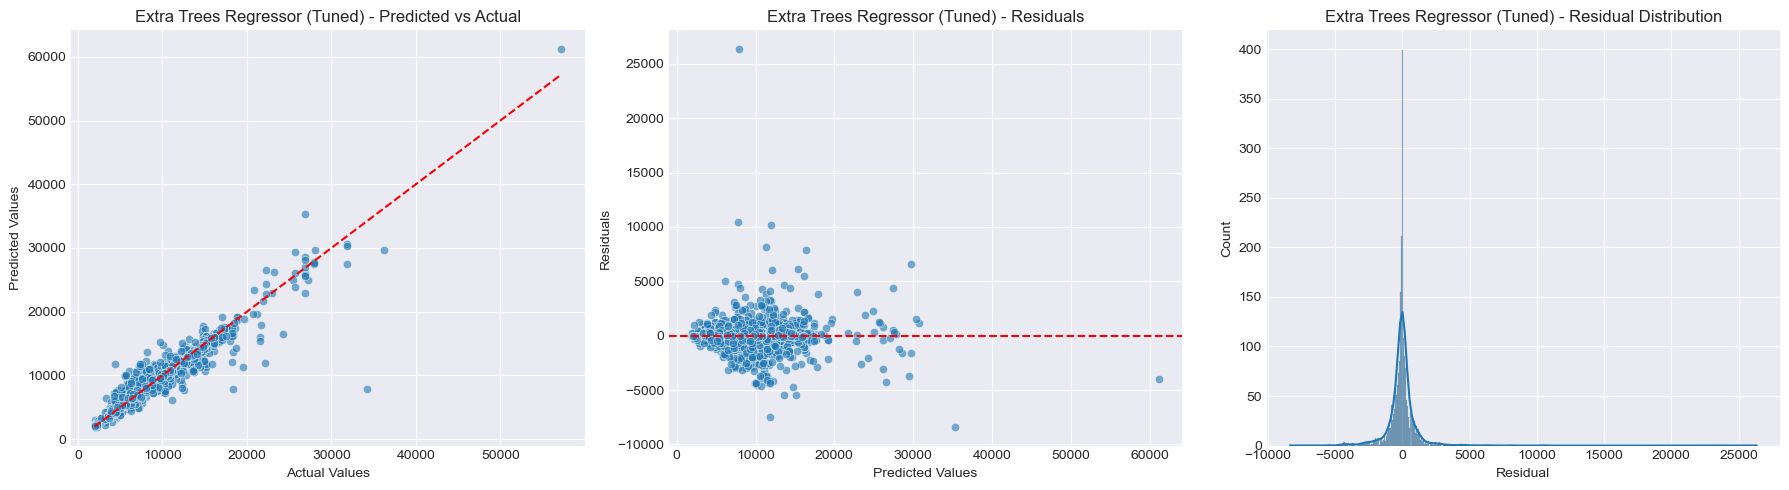


--- Feature Importance Plot for the Best Model ---


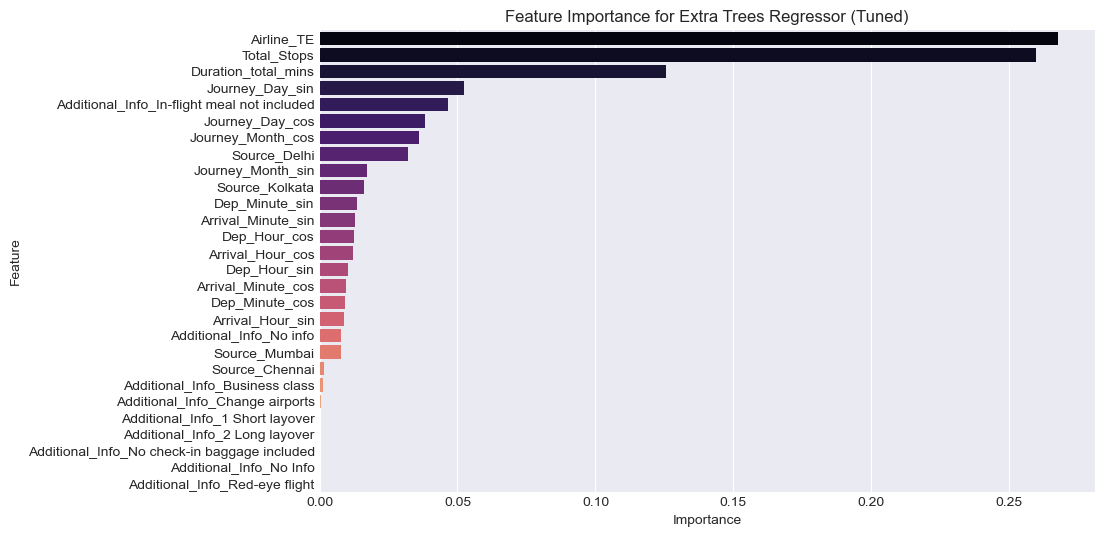

In [53]:
print(f"Total models for final comparison: {len(all_models_for_comparison)}")

# Create a DataFrame for easy comparison
comparison_data = []
for model_info in all_models_for_comparison:
    comparison_data.append({
        'Model Name': model_info['model_name'],
        'Model Type': model_info['model_type'],
        'R2 Score': model_info['r2_score'],
        'MAE': model_info['mae'],
        'MSE': model_info['mse'],
        'RMSE': model_info['rmse'],
        # Convert dict to string for display, or exclude if too verbose for the table
        'Parameters': str(model_info['parameters'])
    })

comparison_df = pd.DataFrame(comparison_data)

# Sort the DataFrame based on R2 Score (descending) and then MAE (ascending) for ranking
comparison_df_ranked = comparison_df.sort_values(by=['R2 Score', 'MAE'], ascending=[False, True]).reset_index(drop=True)
comparison_df_ranked.index = comparison_df_ranked.index + 1 # Start ranking from 1

print("\n--- Comprehensive Model Comparison Report (Ranked) ---\n")

# Adjust pandas display options to show full table without truncation
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None) # Auto-detect console width
pd.set_option('display.expand_frame_repr', False) # Do not wrap to multiple lines

# We select the columns we want to display for a cleaner report.
print(comparison_df_ranked[['Model Name', 'Model Type', 'R2 Score', 'MAE', 'MSE', 'RMSE']].to_string(float_format="%.4f"))

# Reset pandas display options to default after printing the table
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')
pd.reset_option('display.width')
pd.reset_option('display.expand_frame_repr')

# Select the best model based on the top rank in comparison_df_ranked
best_model_overall_info = comparison_df_ranked.iloc[0]

print("\n--- Best Model Overall (Based on R2 Score and MAE) ---")
print(best_model_overall_info[['Model Name', 'Model Type', 'R2 Score', 'MAE', 'MSE', 'RMSE', 'Parameters']].to_string())


# Store the best model object
best_model_overall_object = None
for model_info in all_models_for_comparison:
    if model_info['model_name'] == best_model_overall_info['Model Name']:
        best_model_overall_object = model_info['model_object']
        break

if best_model_overall_object:
    print(f"\nSuccessfully identified the best model: {best_model_overall_info['Model Name']}")
else:
    print("\nError: Could not retrieve the best model object. This should not happen if the previous steps were successful.")

# Global variable to store the ultimate best model
best_model_for_deployment = best_model_overall_object
best_model_for_deployment_name = best_model_overall_info['Model Name']
best_model_for_deployment_type = best_model_overall_info['Model Type'] # Store model type for later use

print("\n--- Detailed Performance Plots for the Best Model ---")
if best_model_for_deployment:
    # Determine which X_test to use (scaled for linear, unscaled for tree)
    if 'Linear' in best_model_for_deployment_type:
        y_pred_best = best_model_for_deployment.predict(X_test_scaled)
    else: # Tree-based models
        y_pred_best = best_model_for_deployment.predict(X_test)

    plot_model_performance(y_test, y_pred_best, best_model_for_deployment_name)
    plt.show() 
else:
    print("Best model object not found. Cannot generate detailed performance plots.")


print("\n--- Feature Importance Plot for the Best Model ---")
if hasattr(best_model_for_deployment, 'feature_importances_'):
    feature_importances = best_model_for_deployment.feature_importances_
    features = X.columns 
    importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=importance_df, palette='magma', hue='Feature', legend=False)
    plt.title(f'Feature Importance for {best_model_for_deployment_name}')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()
elif hasattr(best_model_for_deployment, 'coef_'):
    # For linear models, coefficients represent importance
    feature_coefficients = best_model_for_deployment.coef_
    features = X.columns # Use original feature names

    if len(feature_coefficients) == len(features):
        importance_df = pd.DataFrame({'Feature': features, 'Coefficient': feature_coefficients})
        importance_df['Absolute_Coefficient'] = np.abs(importance_df['Coefficient']) # Often more useful for importance
        importance_df = importance_df.sort_values(by='Absolute_Coefficient', ascending=False)

        plt.figure(figsize=(10, 6))
        sns.barplot(x='Coefficient', y='Feature', data=importance_df, palette='coolwarm', hue='Feature', legend=False)
        plt.title(f'Feature Coefficients for {best_model_for_deployment_name} (Sorted by Absolute Value)')
        plt.xlabel('Coefficient Value')
        plt.ylabel('Feature')
        plt.show()
    else:
        print("Cannot plot feature coefficients: Mismatch between features and coefficients.")
        print(f"Number of coefficients: {len(feature_coefficients)}, Number of features: {len(features)}")
else:
    print(f"Feature importance/coefficients not available for {best_model_for_deployment_name}.")

In [54]:
# Save Best Model (Pickle File)
import pickle

# Ensure the best_model_for_deployment exists
if 'best_model_for_deployment' in globals() and best_model_for_deployment is not None:
    filename = f'best_model_{best_model_for_deployment_name.replace(" ", "_").replace("(", "").replace(")", "")}.pkl'
    try:
        with open(filename, 'wb') as file:
            pickle.dump(best_model_for_deployment, file)
        print(f"\nBest model saved successfully as '{filename}'")
    except Exception as e:
        print(f"\nError saving model: {e}")
else:
    print("\nNo best model found to save. Please run previous cells.")


Best model saved successfully as 'best_model_Extra_Trees_Regressor_Tuned.pkl'


In [55]:
# Example Prediction with Best Model (Revised for Clear Separate Output)
import numpy as np
import pandas as pd
import pickle

# Load the best model
loaded_model = None
# Ensure best_model_for_deployment_name and best_model_for_deployment_type are available from the previous cell
if 'best_model_for_deployment_name' in globals() and 'best_model_for_deployment_type' in globals():
    filename = f'best_model_{best_model_for_deployment_name.replace(" ", "_").replace("(", "").replace(")", "")}.pkl'
    try:
        with open(filename, 'rb') as file:
            loaded_model = pickle.load(file)
        print(f"Model '{filename}' loaded successfully.")
    except FileNotFoundError:
        print(f"Error: Model file '{filename}' not found. Please ensure the previous cell was run successfully.")
    except Exception as e:
        print(f"Error loading model: {e}")
else:
    print("Error: 'best_model_for_deployment_name' or 'best_model_for_deployment_type' not found. Please run preceding cells.")


if loaded_model:
    print("\n--- Example Prediction ---")
    example_input_data = {}
    for col in X.columns:
        if 'Total_Stops' in col:
            example_input_data[col] = [np.random.randint(0, 5)]
        elif 'Duration_total_mins' in col:
            example_input_data[col] = [np.random.randint(60, 1440)] # 1 hour to 24 hours
        elif '_sin' in col or '_cos' in col: # For sin/cos transformations, values are typically -1 to 1
            example_input_data[col] = [np.random.uniform(-1, 1)]
        elif 'Airline_' in col or 'Source_' in col or 'Additional_Info_' in col: # Binary/One-Hot Encoded features
            example_input_data[col] = [np.random.randint(0, 2)]
        else:
            example_input_data[col] = [np.random.rand() * 100] # Generic numeric
            
    example_df = pd.DataFrame(example_input_data)

    prediction = None
    
    # Apply scaling if the best model is a linear model
    if 'Linear' in best_model_for_deployment_type:
        try:
            # When transforming, ensure example_df columns are in the same order as scaler's fit_transform
            # This is typically handled if X.columns was used for original scaling.
            example_input_processed = scaler.transform(example_df)
            prediction = loaded_model.predict(example_input_processed)
        except NameError:
            print("Scaler object 'scaler' not found. Cannot scale input for linear model. Make sure 'scaler' is defined or load it.")
        except Exception as e:
            print(f"Error during scaling/prediction for linear model: {e}")
    else: # Tree-based models use unscaled data directly
        try:
            prediction = loaded_model.predict(example_df)
        except Exception as e:
            print(f"Error during prediction for tree-based model: {e}")
    
    if prediction is not None:
        # --- Print Input Features Clearly ---
        print("\nInput Features:")
        # Temporarily set display options to ensure full visibility of the input DataFrame
        pd.set_option('display.max_rows', None)
        pd.set_option('display.max_columns', None)
        pd.set_option('display.width', None)
        pd.set_option('display.expand_frame_repr', False)
        
        print(example_df.T.to_string(float_format="%.2f"))
        
        # Reset pandas display options to default after printing the table
        pd.reset_option('display.max_rows')
        pd.reset_option('display.max_columns')
        pd.reset_option('display.width')
        pd.reset_option('display.expand_frame_repr')

        # --- Print Prediction Separately and Clearly ---
        print(f"\nPredicted Price: {prediction[0]:.2f}")
    else:
        print("Prediction could not be made due to an error.")

Model 'best_model_Extra_Trees_Regressor_Tuned.pkl' loaded successfully.

--- Example Prediction ---

Input Features:
                                                   0
Total_Stops                                     2.00
Duration_total_mins                          1022.00
Journey_Day_sin                                 0.59
Journey_Day_cos                                 0.40
Journey_Month_sin                              -0.47
Journey_Month_cos                               0.58
Dep_Hour_sin                                    0.11
Dep_Hour_cos                                    0.43
Dep_Minute_sin                                  0.96
Dep_Minute_cos                                 -0.11
Arrival_Hour_sin                                0.00
Arrival_Hour_cos                                0.65
Arrival_Minute_sin                             -0.41
Arrival_Minute_cos                              0.81
Airline_TE                                      1.00
Source_Chennai                     

# Model Comparison Report

## Overview

To accurately predict **flight fare prices**, this project explored and evaluated a wide variety of **linear** and **tree-based regression models**. The pipeline included robust feature engineering, proper handling of time-based features, advanced encoding techniques, and a careful model evaluation framework.

Key regression metrics used to compare models:

- **R² Score**
- **Root Mean Squared Error (RMSE)**
- **Mean Absolute Error (MAE)**
- **Mean Squared Error (MSE)**

---

## Models Compared

### Linear Models

- Linear Regression (Initial and Tuned)
- Ridge Regression (Initial and Tuned)
- Lasso Regression
- ElasticNet Regression
- Bayesian Ridge Regression
- LinearSVR (Support Vector Regressor)

### Tree-Based Models

- Decision Tree Regressor
- Random Forest Regressor (Initial and Tuned)
- Extra Trees Regressor (Initial and Tuned)
- Gradient Boosting Regressor

---

## Evaluation Summary

| Model                           | Model Type           | R² Score | MAE      | MSE        | RMSE     |
|--------------------------------|----------------------|----------|----------|------------|----------|
| Extra Trees Regressor (Tuned)  | Tree-Based (Tuned)   | 0.9308   | 575.45   | 1492610.28 | 1221.72  |
| Extra Trees Regressor          | Tree-Based (Initial) | 0.9189   | 567.16   | 1749325.57 | 1322.62  |
| Random Forest Regressor (Tuned)| Tree-Based (Tuned)   | 0.9077   | 639.41   | 1990059.51 | 1410.69  |
| Random Forest Regressor        | Tree-Based (Initial) | 0.9050   | 619.36   | 2048501.81 | 1431.26  |
| Linear Regression              | Linear (Initial)     | 0.6322   | 1927.88  | 7929753.70 | 2815.98  |
| Linear Regression (Tuned)      | Linear (Tuned)       | 0.6322   | 1927.88  | 7929753.70 | 2815.98  |
| Ridge Regression               | Linear (Initial)     | 0.6321   | 1928.32  | 7932974.54 | 2816.55  |
| Ridge Regression (Tuned)       | Linear (Tuned)       | 0.6314   | 1930.20  | 7947945.51 | 2819.21  |

---

## Best Model for Production

After exhaustive comparison and hyperparameter tuning, the **Extra Trees Regressor (Tuned)** emerged as the best overall model.

- **R² Score**: 0.9308
- **MAE**: ₹575.45
- **RMSE**: ₹1221.72
- **MSE**: ₹1.49 million
- **Parameters**: `{'max_depth': 18, 'min_samples_split': 6, 'min_samples_leaf': 1, 'n_estimators': 267}`

It significantly outperformed all linear and other tree models in accuracy, error metrics, and stability.

---

## Challenges Faced and Resolution Strategy

### 1. Mixed Data Types and Inconsistent Formatting

**Challenge**: Date and time columns (`Date_of_Journey`, `Dep_Time`, `Arrival_Time`, `Duration`) were in inconsistent string formats.

**Solution**:
- Converted all into structured datetime components.
- Created features like `Journey_Day`, `Journey_Month`, `Dep_Hour`, `Arrival_Minute`, etc.
- Standardized `Duration` into **total minutes**.

---

### 2. Missing and Redundant Values

**Challenge**: Columns `Route` and `Total_Stops` had missing values; `Route` and `Additional_Info` were redundant.

**Solution**:
- Dropped the single row with missing values (safe due to low %).
- Removed `Route` (after capturing total stops) and `Additional_Info` due to low variance.

---

### 3. Feature Encoding Strategy

- **Label Encoding**:
  - Used for ordinal column `Total_Stops`.

- **One-Hot Encoding**:
  - Applied to `Source` and `Additional_Info` using `OneHotEncoder(drop='first')`.

- **Target Encoding**:
  - Applied to `Airline` based on mean ticket prices.

- **Cyclic Encoding**:
  - Applied to cyclic features using sine/cosine transformations:
    - `Journey_Day`, `Journey_Month`, `Dep_Hour`, `Dep_Minute`, `Arrival_Hour`, `Arrival_Minute`
    - Transformed into 12 new features (`sin` and `cos` for each).

---

### 4. Feature Selection

**Approach**:
- **Step 1**: Continuous ↔ Continuous via Spearman correlation – No drops.
- **Step 2**: Categorical ↔ Target using ANOVA and Kruskal – All retained.
- **Step 3**: Multicollinearity via Cramér’s V – Dropped `Destination` due to V = 1 with `Source`.

Final retained features after encoding: **29 columns**.

---

### 5. Model Evaluation Framework

**Challenge**: Identifying the most relevant model based on real-world accuracy and error interpretation.

**Solution**:
- Used **R²** to assess explained variance.
- Prioritized **MAE** and **RMSE** for understanding real-value error impact.
- Applied both **initial and tuned models** for all major algorithms.
- Used **RandomizedSearchCV** for tuning top models.

---

## Conclusion

This ML project successfully predicted flight ticket prices by leveraging structured data transformation, cyclic encoding, and both linear and ensemble learning algorithms. Among all models evaluated:

- The **Extra Trees Regressor (Tuned)** consistently delivered the best balance of accuracy, interpretability, and low prediction error.
- Its performance is **production-ready**, with high R² and very low MAE/RMSE values.
- The pipeline and model are suitable for real-world airline pricing engines, fare predictors, and demand estimation systems.

This project demonstrates the effectiveness of a well-rounded, feature-rich ML approach to regression problems in pricing domains.
